In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
# 더 필요한 라이브러리를 아래에 추가합니다.
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

# 시각화 한글폰트 설정
plt.rc('font', family='Malgun')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

In [160]:
data=joblib.load('data2.pkl')

In [161]:
data.head()

Date  차량운행   접수건   탑승건  평균대기시간  평균요금  평균승차거리  target  temp_max  \
0 2015-01-01   213  1023   924    23.2  2427   10764    17.2      -2.0   
1 2015-01-02   420  3158  2839    17.2  2216    8611    26.2       2.4   
2 2015-01-03   209  1648  1514    26.2  2377   10198    24.5       8.2   
3 2015-01-04   196  1646  1526    24.5  2431   10955    26.2       7.9   
4 2015-01-05   421  4250  3730    26.2  2214    8663    23.6       4.1   

   temp_min  ...  year  holiday  7일간 평균대기시간       탑승률   차량당 접수건수  차량당 탑승건수  \
0      -8.9  ...  2015      1.0         NaN  0.903226   4.802817  4.338028   
1      -9.2  ...  2015      0.0         NaN  0.898987   7.519048  6.759524   
2       0.2  ...  2015      0.0         NaN  0.918689   7.885167  7.244019   
3      -0.9  ...  2015      0.0         NaN  0.927096   8.397959  7.785714   
4      -7.4  ...  2015      0.0         NaN  0.877647  10.095012  8.859857   

  temp_mean  humidity_mean(%)  temp_day  rainday  
0      3.45              17.5       6.9        0  
1      5.80              18.0      11.6        0  
2      4.00              15.5       8.0        0  
3      4.40              21.5       8.8        0  
4      5.75              34.5      11.5        1  

[5 rows x 27 columns]

In [162]:
data.tail()

Date  차량운행   접수건   탑승건  평균대기시간  평균요금  평균승차거리  target  temp_max  \
2916 2022-12-25   217  1945  1588    38.7  2416   10212    39.2       1.5   
2917 2022-12-26   603  5555  4605    39.2  2163    7889    44.4       3.0   
2918 2022-12-27   669  5635  4654    44.4  2198    8178    44.8      -0.3   
2919 2022-12-28   607  5654  4648    44.8  2161    7882    52.5       1.7   
2920 2022-12-29   581  5250  4247    52.5  2229    8433    38.3       2.1   

      temp_min  ...  year  holiday  7일간 평균대기시간       탑승률  차량당 접수건수  차량당 탑승건수  \
2916      -7.9  ...  2022      1.0   45.114286  0.816452  8.963134  7.317972   
2917      -7.3  ...  2022      0.0   43.485714  0.828983  9.212272  7.636816   
2918      -5.4  ...  2022      0.0   42.771429  0.825909  8.423019  6.956652   
2919      -7.8  ...  2022      0.0   43.514286  0.822073  9.314662  7.657331   
2920      -4.0  ...  2022      0.0   42.957143  0.808952  9.036145  7.309811   

     temp_mean  humidity_mean(%)  temp_day  rainday  
2916      4.70              19.5       9.4        0  
2917      5.15              17.5      10.3        0  
2918      2.55              26.0       5.1        1  
2919      4.75              18.5       9.5        0  
2920      3.05              24.5       6.1        0  

[5 rows x 27 columns]

In [163]:
data.describe()

Date         차량운행          접수건          탑승건  \
count                           2921  2921.000000  2921.000000  2921.000000   
mean   2018-12-30 08:16:25.963710976   418.638822  3924.971585  3283.426224   
min              2015-01-01 00:00:00   132.000000   527.000000   462.000000   
25%              2016-12-31 00:00:00   278.000000  2160.000000  1778.000000   
50%              2018-12-30 00:00:00   454.000000  4720.000000  3932.000000   
75%              2020-12-29 00:00:00   522.000000  5110.000000  4241.000000   
max              2022-12-29 00:00:00  1413.000000  6182.000000  5189.000000   
std                              NaN   133.737178  1510.011219  1249.476808   

            평균대기시간         평균요금        평균승차거리       target     temp_max  \
count  2921.000000  2921.000000   2921.000000  2921.000000  2921.000000   
mean     40.303115  2304.399178   9254.667580    40.308422    18.087196   
min      17.200000  2131.000000   7672.000000    17.200000   -11.200000   
25%      29.600000  2228.000000   8521.000000    29.600000     9.000000   
50%      38.200000  2257.000000   8822.000000    38.200000    19.700000   
75%      48.600000  2401.000000  10154.000000    48.600000    27.400000   
max      96.100000  2733.000000  14136.000000    96.100000    39.400000   
std      14.103535   107.364736   1020.207827    14.099876    10.699167   

          temp_min  ...         year      holiday   7일간 평균대기시간          탑승률  \
count  2921.000000  ...  2921.000000  2921.000000  2915.000000  2921.000000   
mean      9.419788  ...  2018.496748     0.041082    40.316457     0.841584   
min     -18.500000  ...  2015.000000     0.000000    18.800000     0.596996   
25%       0.500000  ...  2016.000000     0.000000    31.292857     0.805973   
50%      10.000000  ...  2018.000000     0.000000    39.042857     0.845660   
75%      18.900000  ...  2020.000000     0.000000    47.028571     0.877722   
max      30.400000  ...  2022.000000     1.000000    83.928571     0.968844   
std      10.781643  ...     2.290258     0.198513    12.034349     0.052177   

          차량당 접수건수     차량당 탑승건수    temp_mean  humidity_mean(%)     temp_day  \
count  2921.000000  2921.000000  2921.000000       2921.000000  2921.000000   
mean      9.224299     7.712561     4.333704         18.997809     8.667408   
min       2.028481     1.933544     0.000000          0.000000     0.000000   
25%       8.414508     7.102459     3.300000         14.500000     6.600000   
50%       9.576355     7.921225     4.350000         18.500000     8.700000   
75%      10.412955     8.704388     5.350000         23.500000    10.700000   
max      14.325513    10.752747     9.050000         42.000000    18.100000   
std       1.856816     1.422929     1.487866          6.545043     2.975732   

           rainday  
count  2921.000000  
mean      0.285519  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  
std       0.451738  

[8 rows x 25 columns]

In [164]:
data.isnull().sum()

Date                0
차량운행                0
접수건                 0
탑승건                 0
평균대기시간              0
평균요금                0
평균승차거리              0
target              0
temp_max            0
temp_min            0
rain(mm)            0
humidity_max(%)     0
humidity_min(%)     0
sunshine(MJ/m2)     0
weekday             0
month               0
season              0
year                0
holiday             0
7일간 평균대기시간          6
탑승률                 0
차량당 접수건수            0
차량당 탑승건수            0
temp_mean           0
humidity_mean(%)    0
temp_day            0
rainday             0
dtype: int64

In [165]:
data['7일간 평균대기시간'] = data['7일간 평균대기시간'].rolling(window=7).mean()
data['7일간 평균대기시간'] = data['7일간 평균대기시간'].fillna(method='bfill')

In [166]:
data.isnull().sum()

Date                0
차량운행                0
접수건                 0
탑승건                 0
평균대기시간              0
평균요금                0
평균승차거리              0
target              0
temp_max            0
temp_min            0
rain(mm)            0
humidity_max(%)     0
humidity_min(%)     0
sunshine(MJ/m2)     0
weekday             0
month               0
season              0
year                0
holiday             0
7일간 평균대기시간          0
탑승률                 0
차량당 접수건수            0
차량당 탑승건수            0
temp_mean           0
humidity_mean(%)    0
temp_day            0
rainday             0
dtype: int64

In [167]:
data1 = data[['Date', '접수건', '탑승건', 'target', 'temp_max', 'temp_min', 'holiday','7일간 평균대기시간', '탑승률', '차량당 접수건수', '차량당 탑승건수']]
data1.set_index('Date', inplace = True)
data1

접수건   탑승건  target  temp_max  temp_min  holiday  7일간 평균대기시간  \
Date                                                                      
2015-01-01  1023   924    17.2      -2.0      -8.9      1.0   25.287755   
2015-01-02  3158  2839    26.2       2.4      -9.2      0.0   25.287755   
2015-01-03  1648  1514    24.5       8.2       0.2      0.0   25.287755   
2015-01-04  1646  1526    26.2       7.9      -0.9      0.0   25.287755   
2015-01-05  4250  3730    23.6       4.1      -7.4      0.0   25.287755   
...          ...   ...     ...       ...       ...      ...         ...   
2022-12-25  1945  1588    39.2       1.5      -7.9      1.0   43.844898   
2022-12-26  5555  4605    44.4       3.0      -7.3      0.0   44.157143   
2022-12-27  5635  4654    44.8      -0.3      -5.4      0.0   44.208163   
2022-12-28  5654  4648    52.5       1.7      -7.8      0.0   44.285714   
2022-12-29  5250  4247    38.3       2.1      -4.0      0.0   43.959184   

                 탑승률   차량당 접수건수  차량당 탑승건수  
Date                                       
2015-01-01  0.903226   4.802817  4.338028  
2015-01-02  0.898987   7.519048  6.759524  
2015-01-03  0.918689   7.885167  7.244019  
2015-01-04  0.927096   8.397959  7.785714  
2015-01-05  0.877647  10.095012  8.859857  
...              ...        ...       ...  
2022-12-25  0.816452   8.963134  7.317972  
2022-12-26  0.828983   9.212272  7.636816  
2022-12-27  0.825909   8.423019  6.956652  
2022-12-28  0.822073   9.314662  7.657331  
2022-12-29  0.808952   9.036145  7.309811  

[2921 rows x 10 columns]

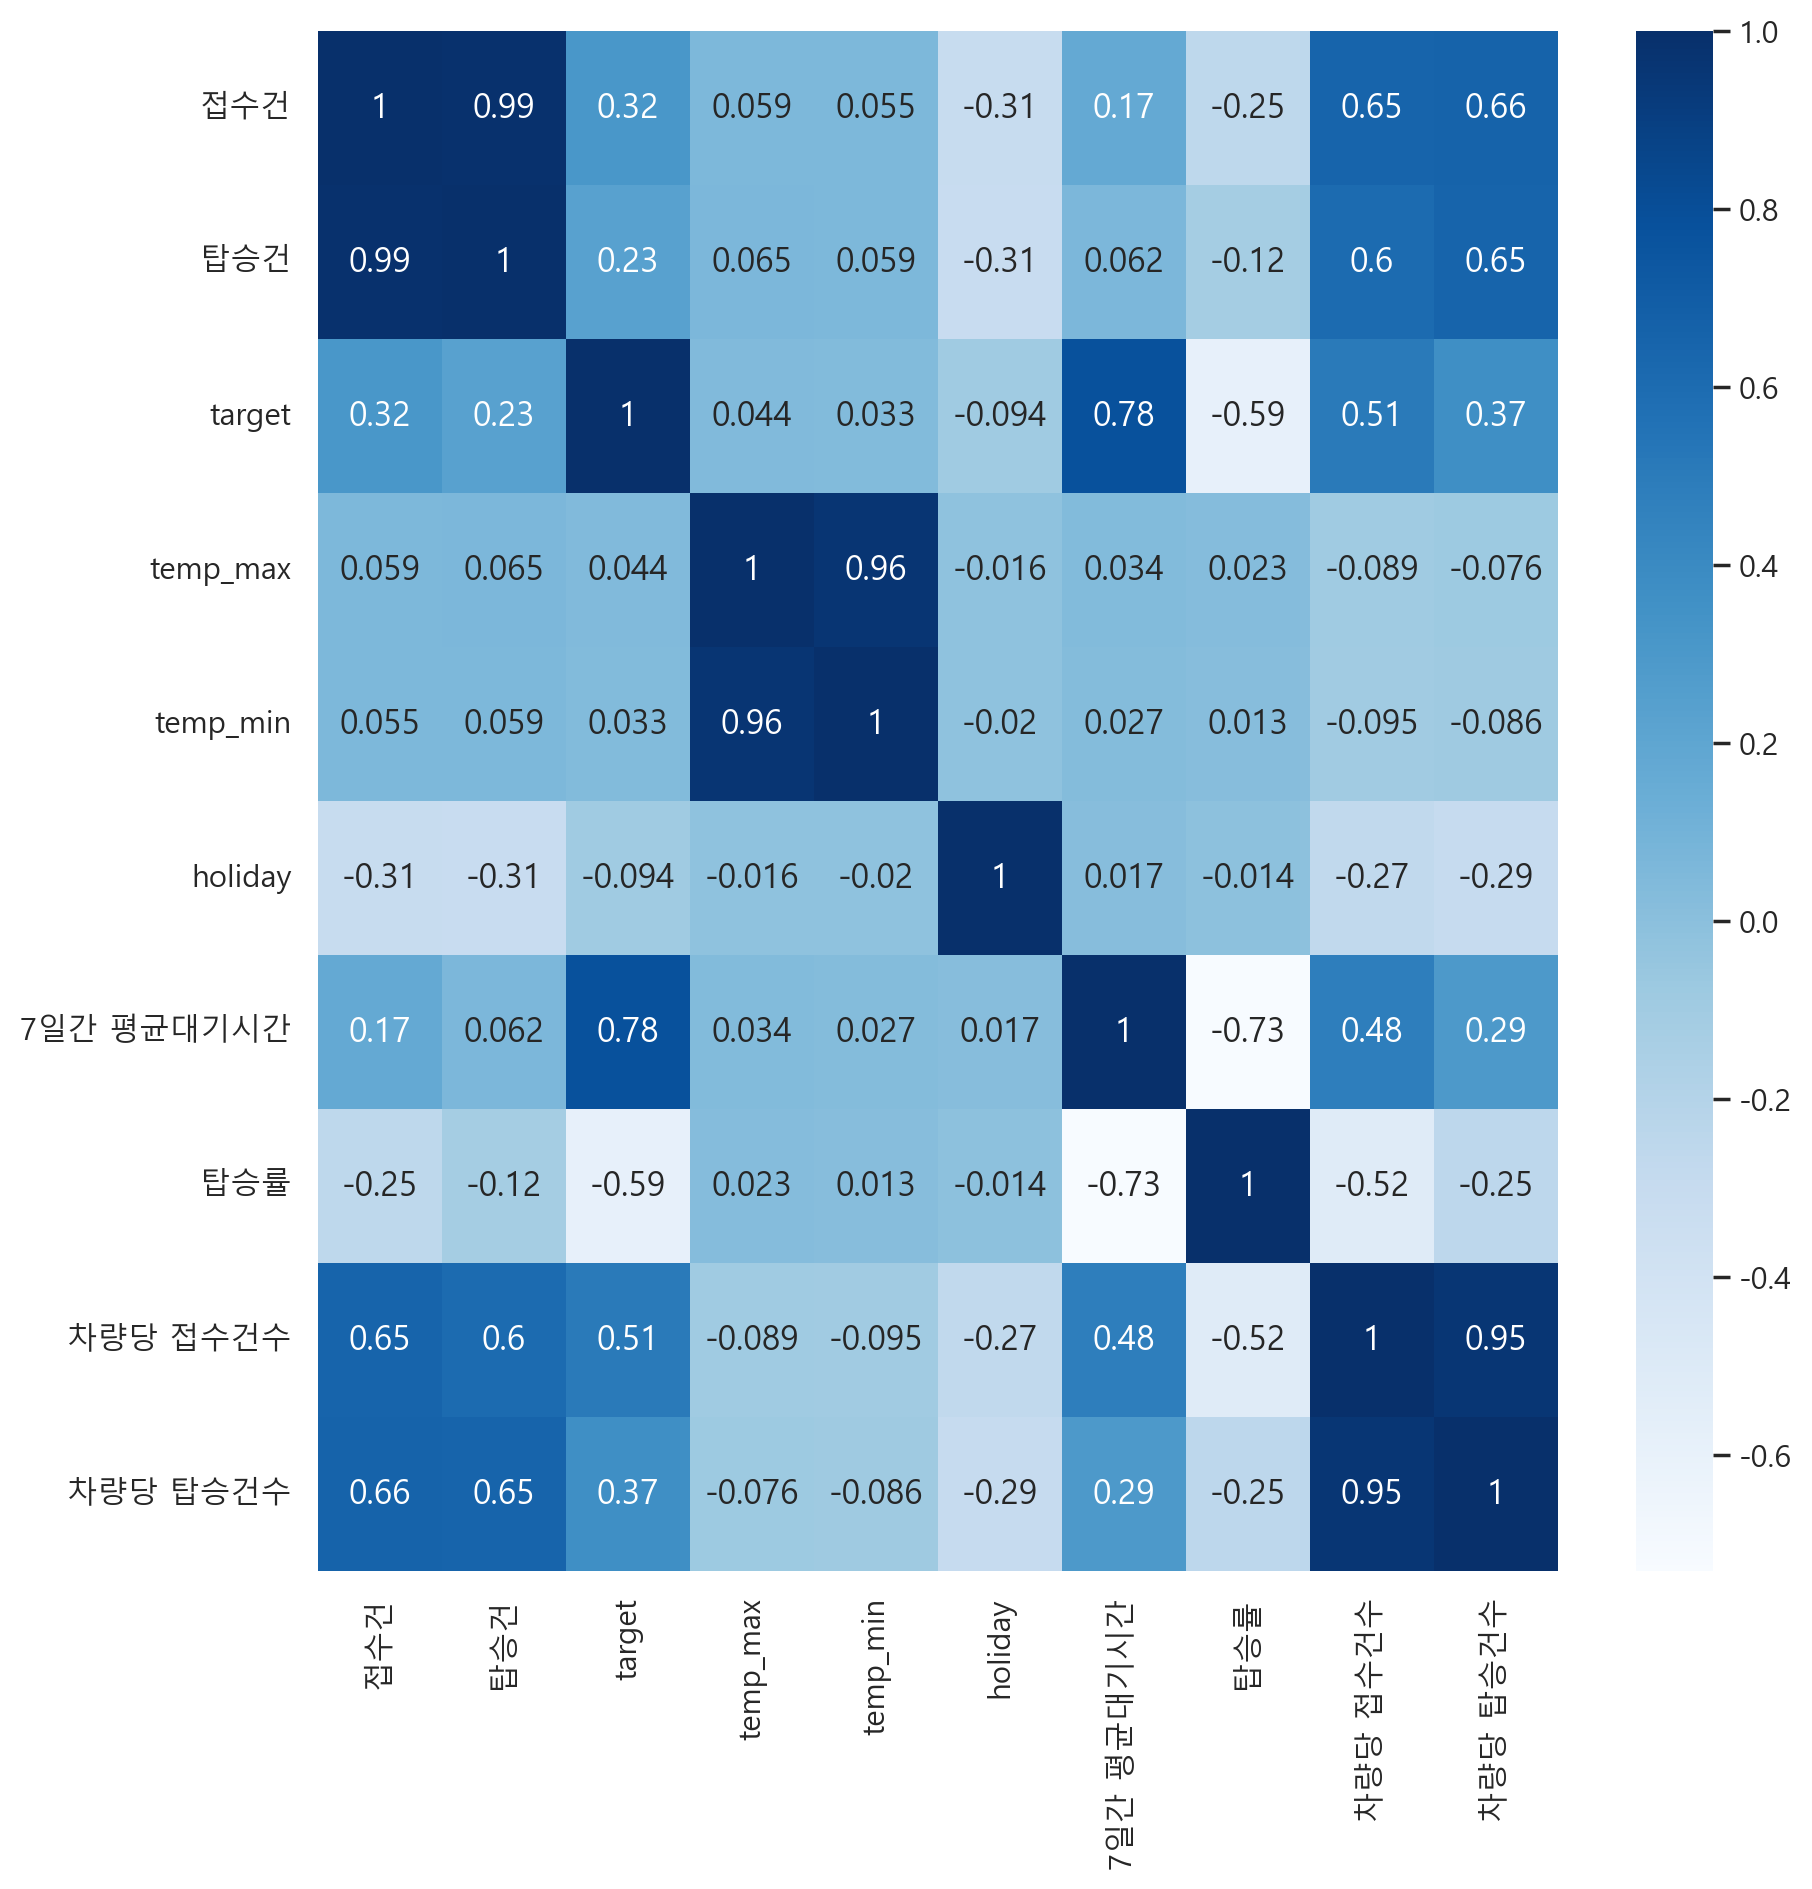

In [168]:
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(numeric_only=True),cmap='Blues',annot=True)
plt.show()

In [169]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2921 entries, 2015-01-01 to 2022-12-29
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   접수건         2921 non-null   int64  
 1   탑승건         2921 non-null   int64  
 2   target      2921 non-null   float64
 3   temp_max    2921 non-null   float64
 4   temp_min    2921 non-null   float64
 5   holiday     2921 non-null   float64
 6   7일간 평균대기시간  2921 non-null   float64
 7   탑승률         2921 non-null   float64
 8   차량당 접수건수    2921 non-null   float64
 9   차량당 탑승건수    2921 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 251.0 KB


In [170]:
data_15_19 = data1.iloc[:1827, :]
data_20_22 = data1.iloc[1827:, :]

In [171]:
data_20_22

접수건   탑승건  target  temp_max  temp_min  holiday  7일간 평균대기시간  \
Date                                                                      
2020-01-01  1916  1156    36.7       3.8      -0.7      1.0   44.757143   
2020-01-02  4834  3524    39.8       4.3      -3.3      0.0   43.965306   
2020-01-03  4766  3645    27.5       6.1      -2.7      0.0   43.020408   
2020-01-04  2159  1640    34.6       6.5      -3.1      0.0   42.310204   
2020-01-05  1943  1640    45.6       4.5       0.7      0.0   41.353061   
...          ...   ...     ...       ...       ...      ...         ...   
2022-12-25  1945  1588    39.2       1.5      -7.9      1.0   43.844898   
2022-12-26  5555  4605    44.4       3.0      -7.3      0.0   44.157143   
2022-12-27  5635  4654    44.8      -0.3      -5.4      0.0   44.208163   
2022-12-28  5654  4648    52.5       1.7      -7.8      0.0   44.285714   
2022-12-29  5250  4247    38.3       2.1      -4.0      0.0   43.959184   

                 탑승률   차량당 접수건수  차량당 탑승건수  
Date                                       
2020-01-01  0.603340   9.676768  5.838384  
2020-01-02  0.729003  12.588542  9.177083  
2020-01-03  0.764792  12.251928  9.370180  
2020-01-04  0.759611   9.033473  6.861925  
2020-01-05  0.844056   9.913265  8.367347  
...              ...        ...       ...  
2022-12-25  0.816452   8.963134  7.317972  
2022-12-26  0.828983   9.212272  7.636816  
2022-12-27  0.825909   8.423019  6.956652  
2022-12-28  0.822073   9.314662  7.657331  
2022-12-29  0.808952   9.036145  7.309811  

[1094 rows x 10 columns]

In [172]:
target = 'target'
x = data_15_19.drop(target, axis = 1)
y = data_15_19.loc[:, target]

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=False)

In [174]:
x_tr, x_val, y_tr, y_val = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)

In [175]:
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_tr)
x_test_s = scaler.fit_transform(x_val)

In [176]:
model_name = ['KNeighborsRegressor', 'LinearRegression', 'Lasso', 'Ridge', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'XGBRegressor', 'LGBMRegressor']
models = [KNeighborsRegressor(n_neighbors=5), LinearRegression(), Lasso(), Ridge(), DTR(), RFR(), GBR(), XGBRegressor(),LGBMRegressor(verbose=-1)]

In [177]:
def pred_plot(y_val, pred, date):
    plt.figure(figsize = (18,6))
    sns.lineplot(x=date, y = y_val.values, label = 'actual value', marker = 'o')
    sns.lineplot(x=date, y = pred, label = 'predicted value', marker = 'o')
    plt.ylim(0,120)
    plt.grid()
    plt.show()
    
def create_model(models, model_name, x_train, x_test, y_train, y_test, x_train_s, x_test_s):
    for model, model_name in zip(models, model_name):
        if model_name == 'KNeighborsRegressor':
            model.fit(x_train_s, y_train)
            y_pred = model.predict(x_test_s)
            print('=' * 10, model_name, '=' * 30)
            print('MAPE : ', mean_absolute_percentage_error(y_test, y_pred))
            print('MAE : ', mean_absolute_error(y_test, y_pred).round(5))
            print('R2 : ', r2_score(y_test, y_pred).round(5))
            joblib.dump(model, model_name + '.pkl')
            pred_plot(y_test, y_pred, y_test.index)
        else:
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            print('=' * 10, model_name, '=' * 30)
            print('MAPE : ', mean_absolute_percentage_error(y_test, y_pred))
            print('MAE : ', mean_absolute_error(y_test, y_pred).round(5))
            print('R2 : ', r2_score(y_test, y_pred).round(5))
            joblib.dump(model, model_name + '.pkl')
            pred_plot(y_test, y_pred, y_test.index)

========== KNeighborsRegressor ==============================
MAPE :  0.20759936332402476
MAE :  10.43525
R2 :  -0.3723


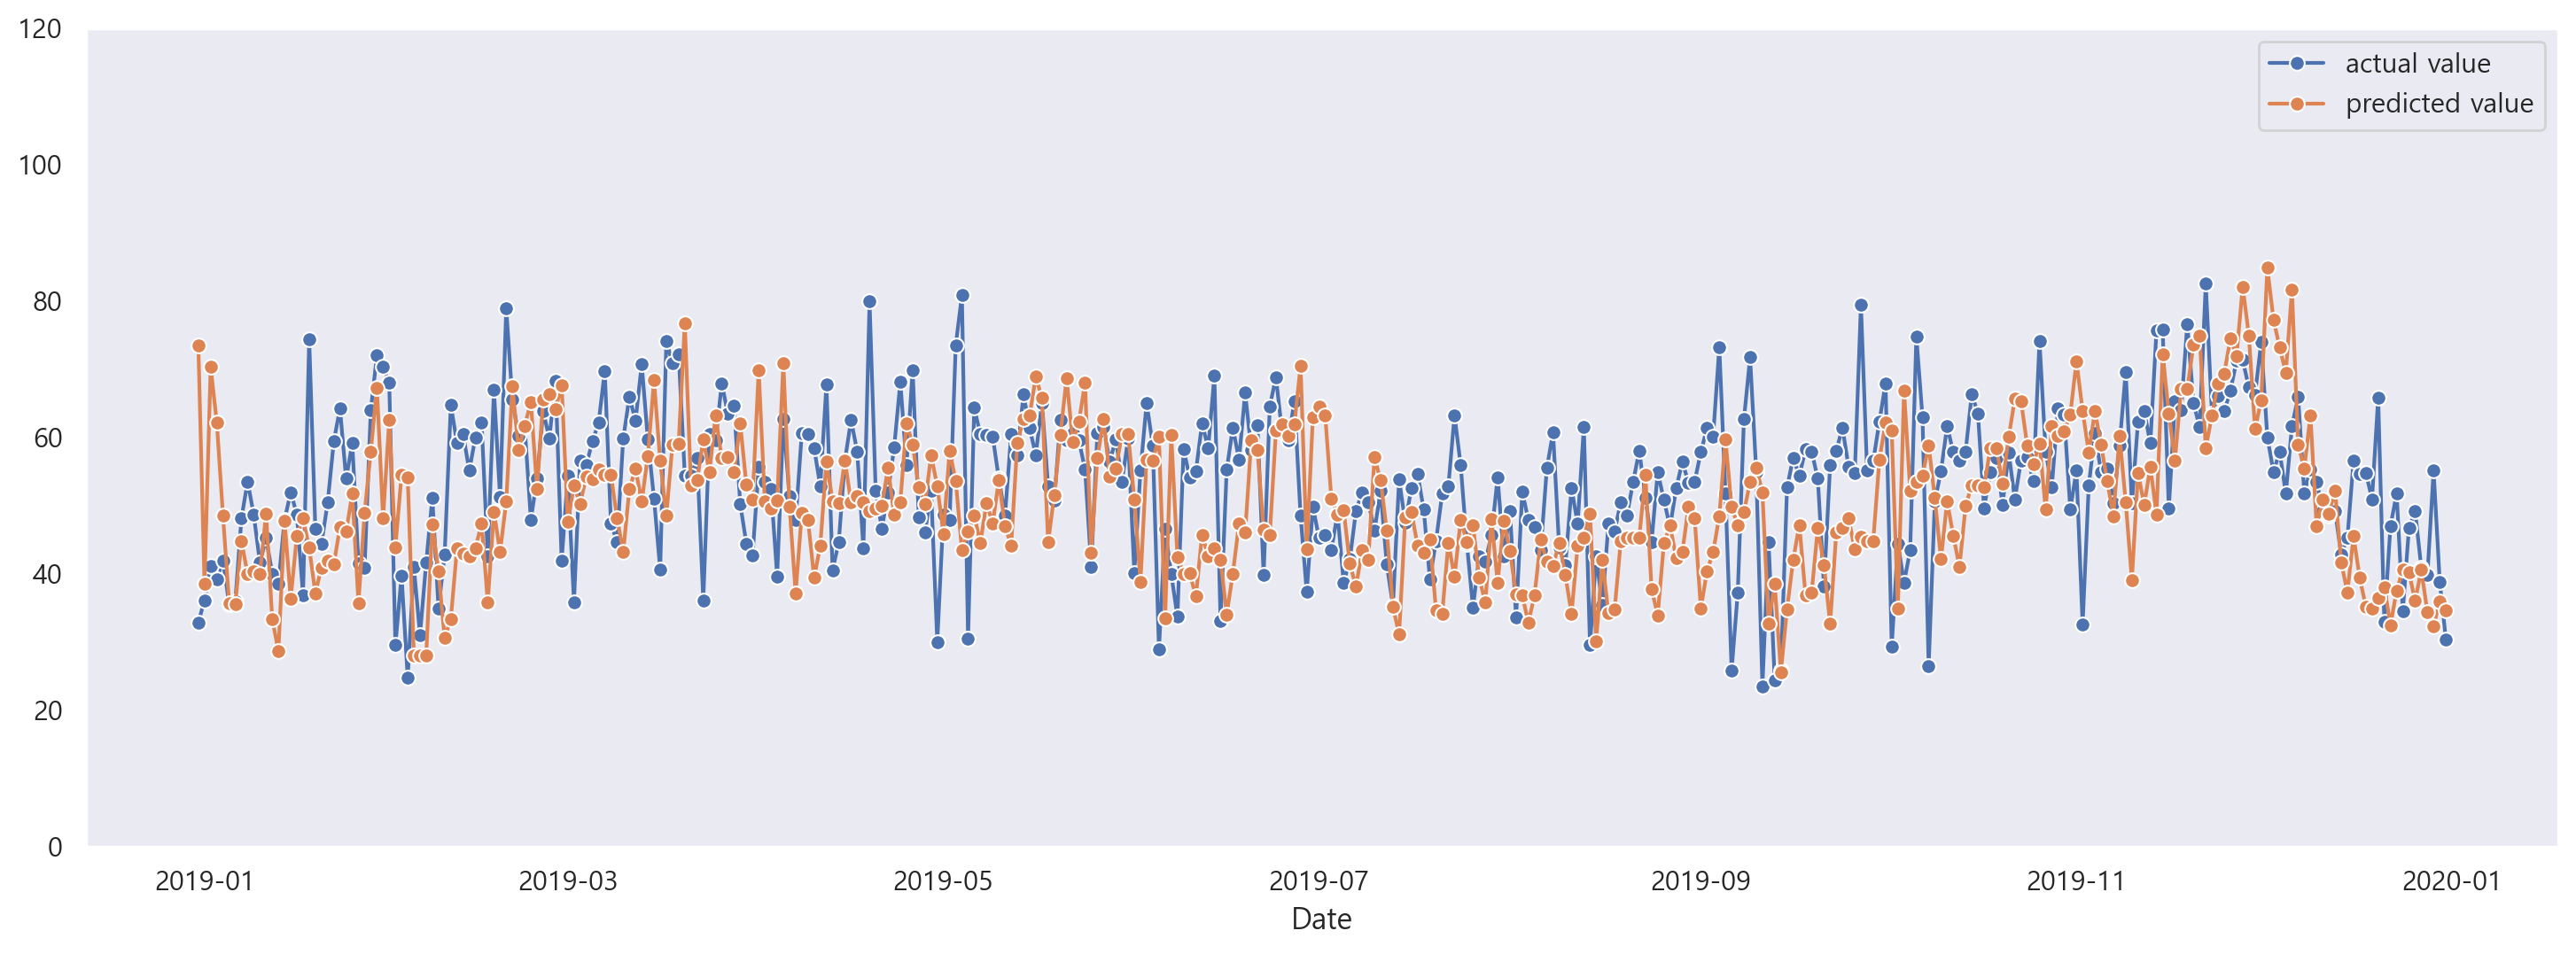

========== LinearRegression ==============================
MAPE :  0.17297188639930422
MAE :  8.09725
R2 :  0.09054


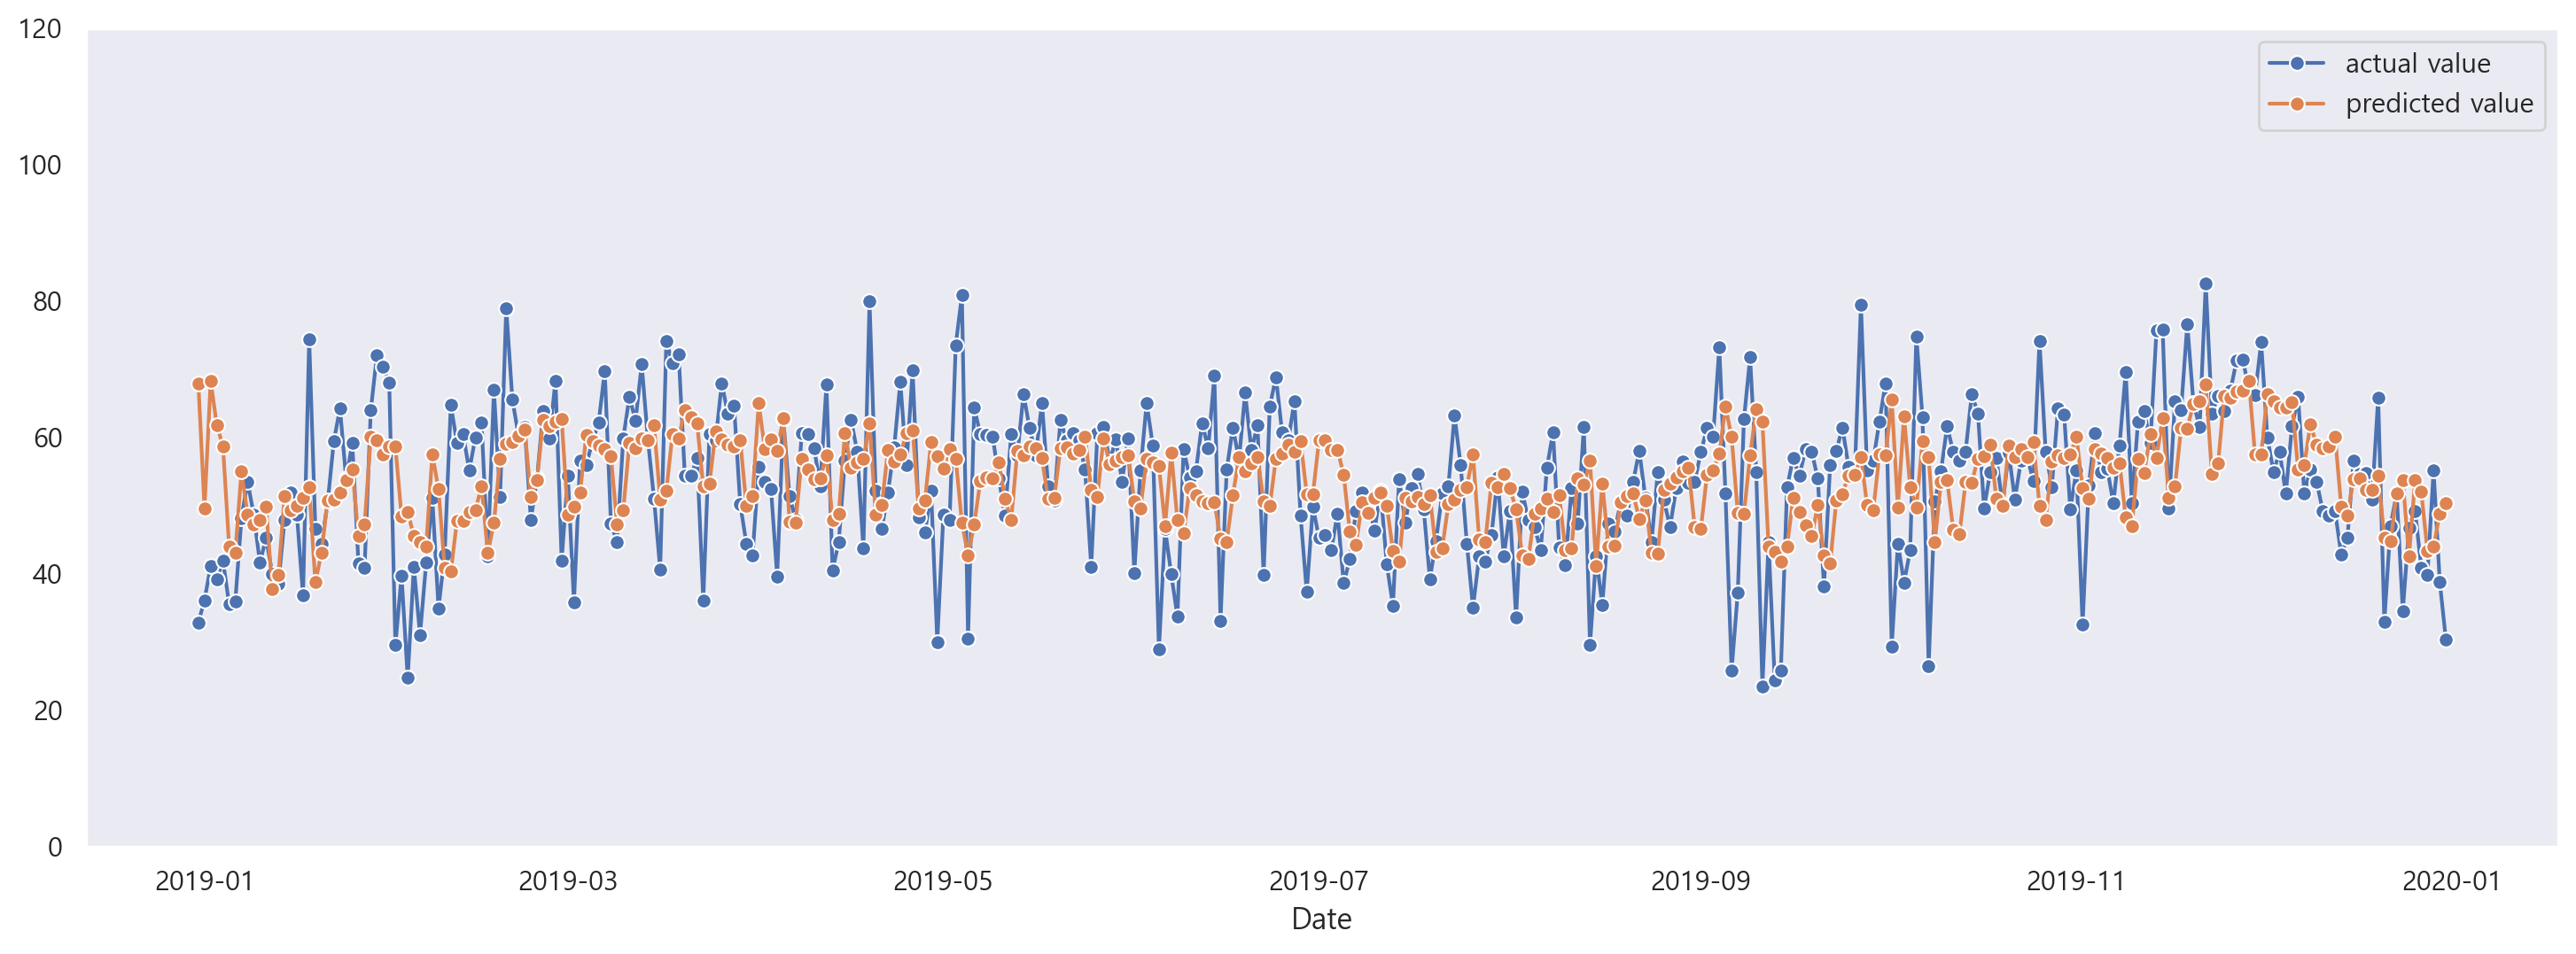

========== Lasso ==============================
MAPE :  0.17665447701904902
MAE :  8.25814
R2 :  0.06296


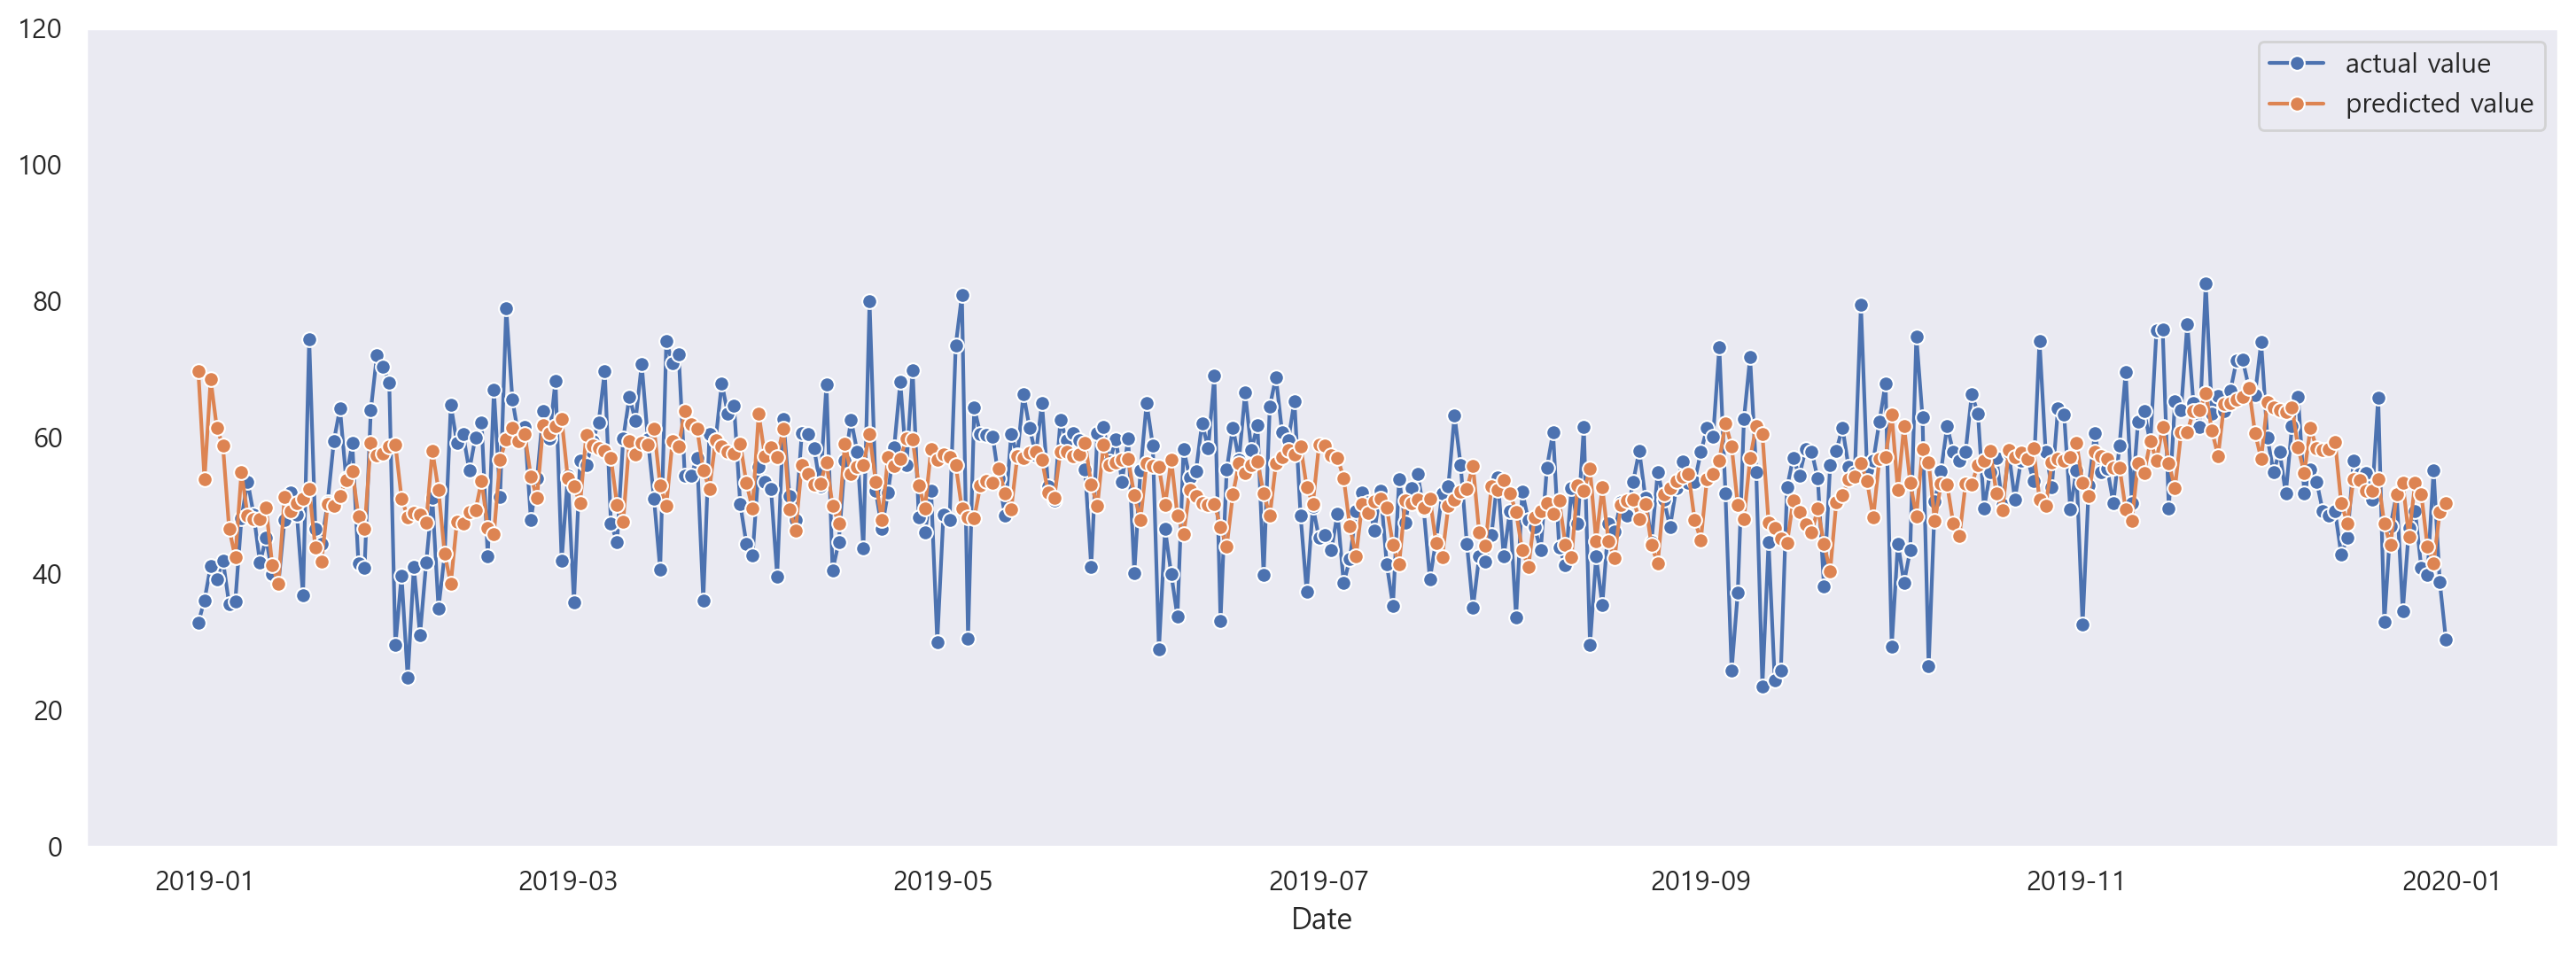

========== Ridge ==============================
MAPE :  0.17260213530421556
MAE :  8.0899
R2 :  0.09062


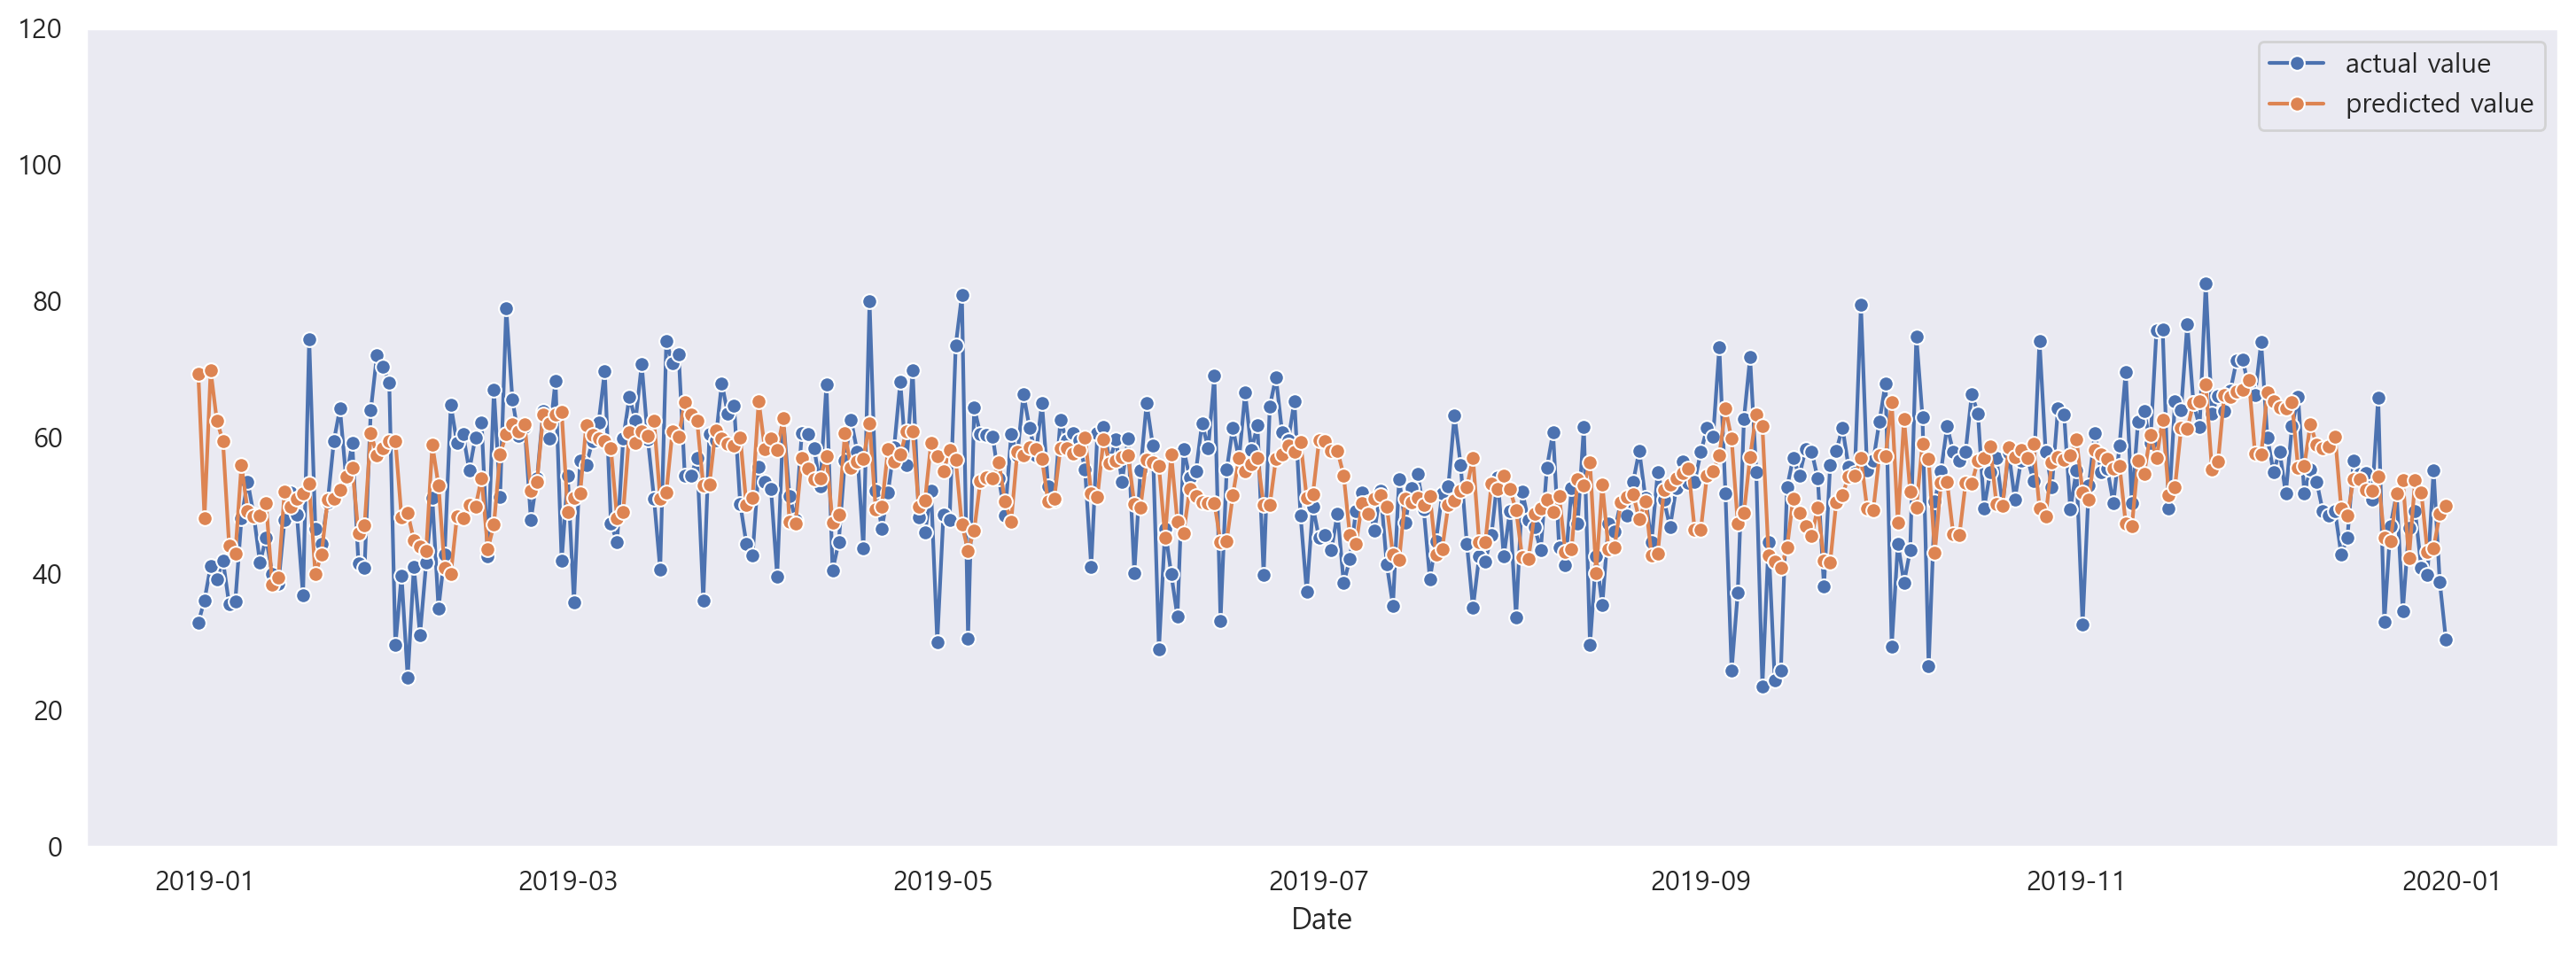

========== DecisionTreeRegressor ==============================
MAPE :  0.21836104546833646
MAE :  10.80383
R2 :  -0.57341


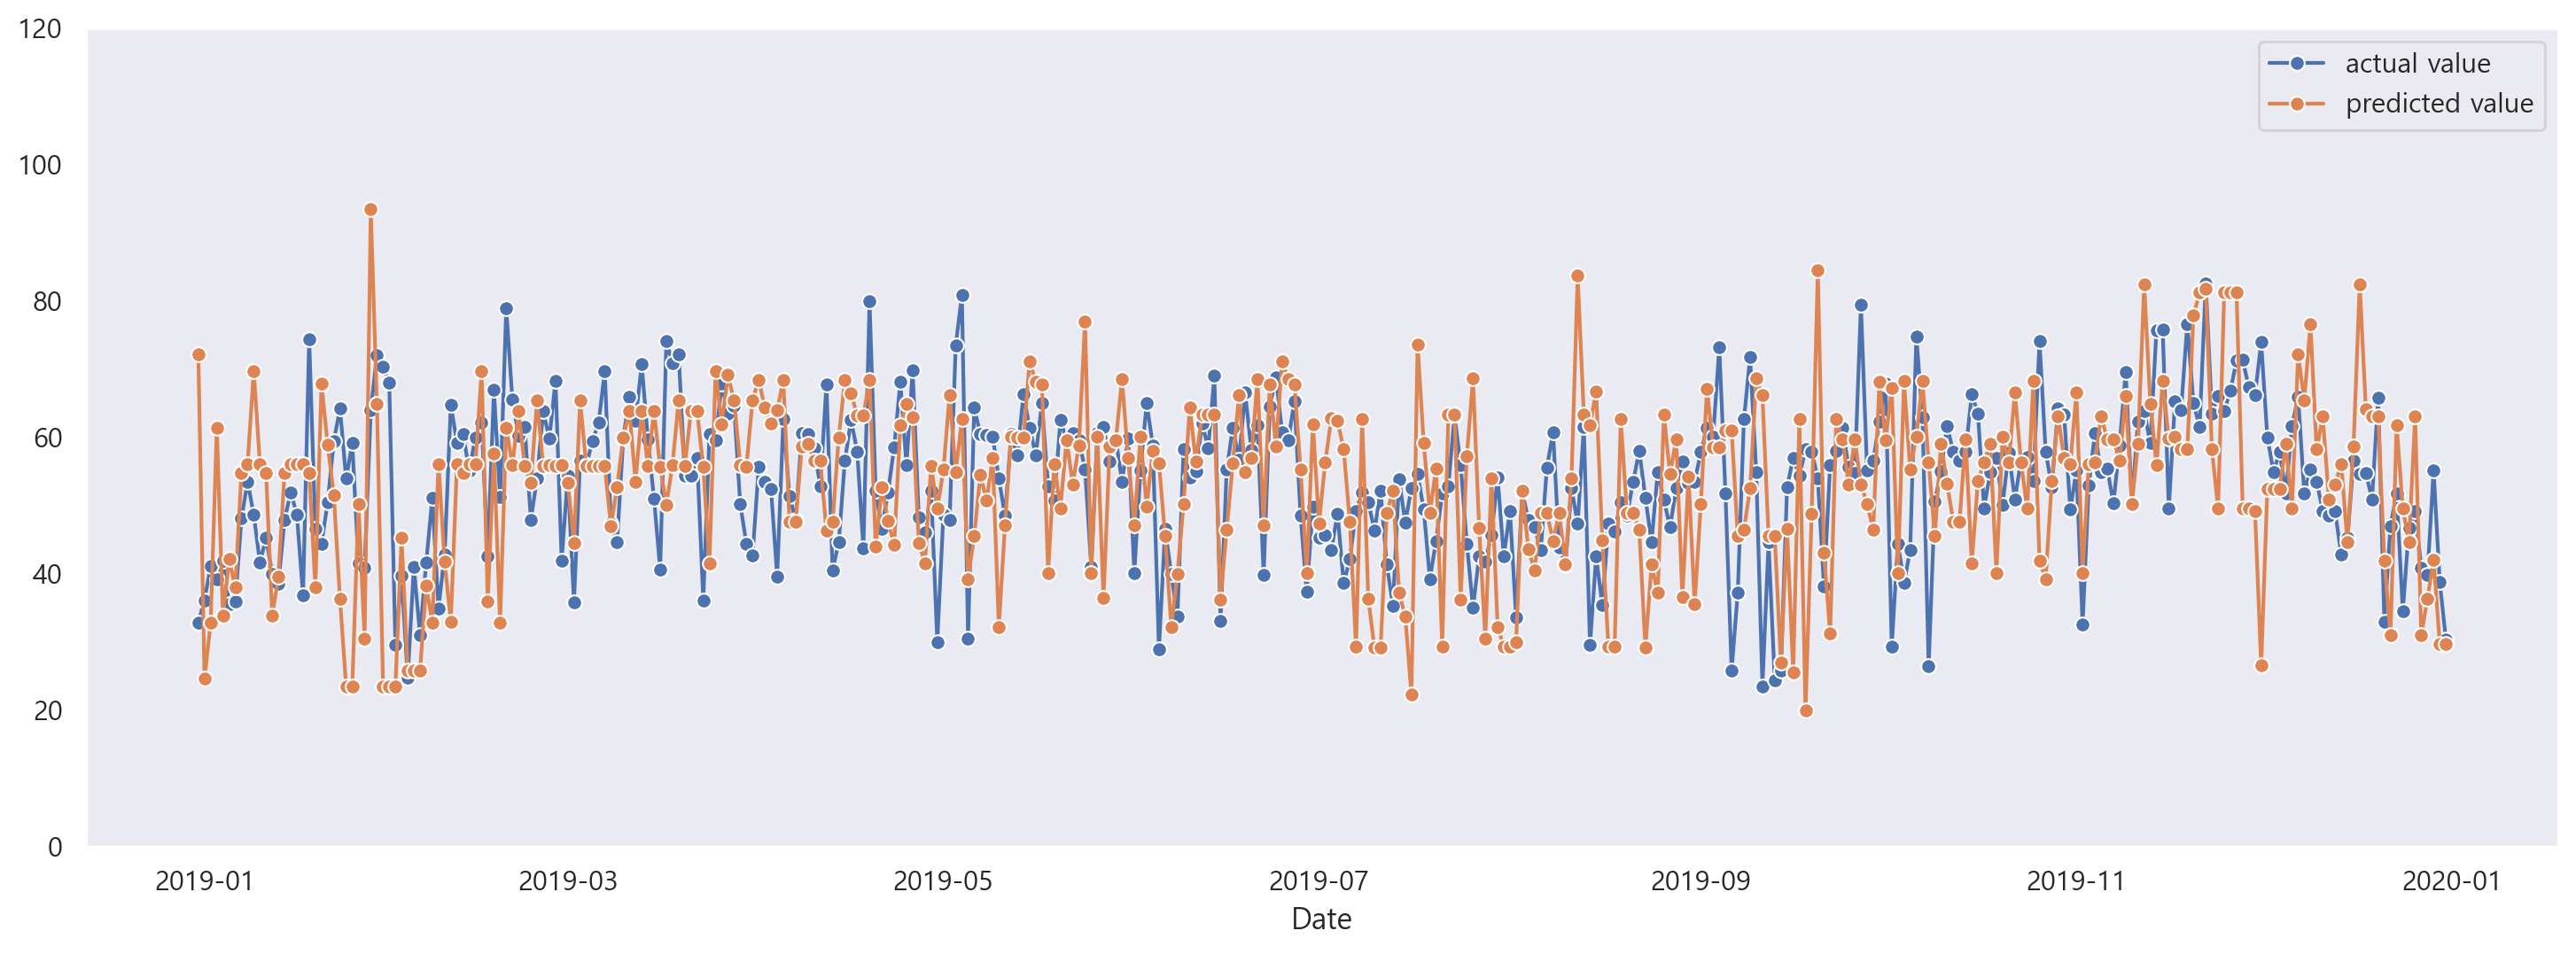

========== RandomForestRegressor ==============================
MAPE :  0.1664789889088026
MAE :  8.10806
R2 :  0.11645


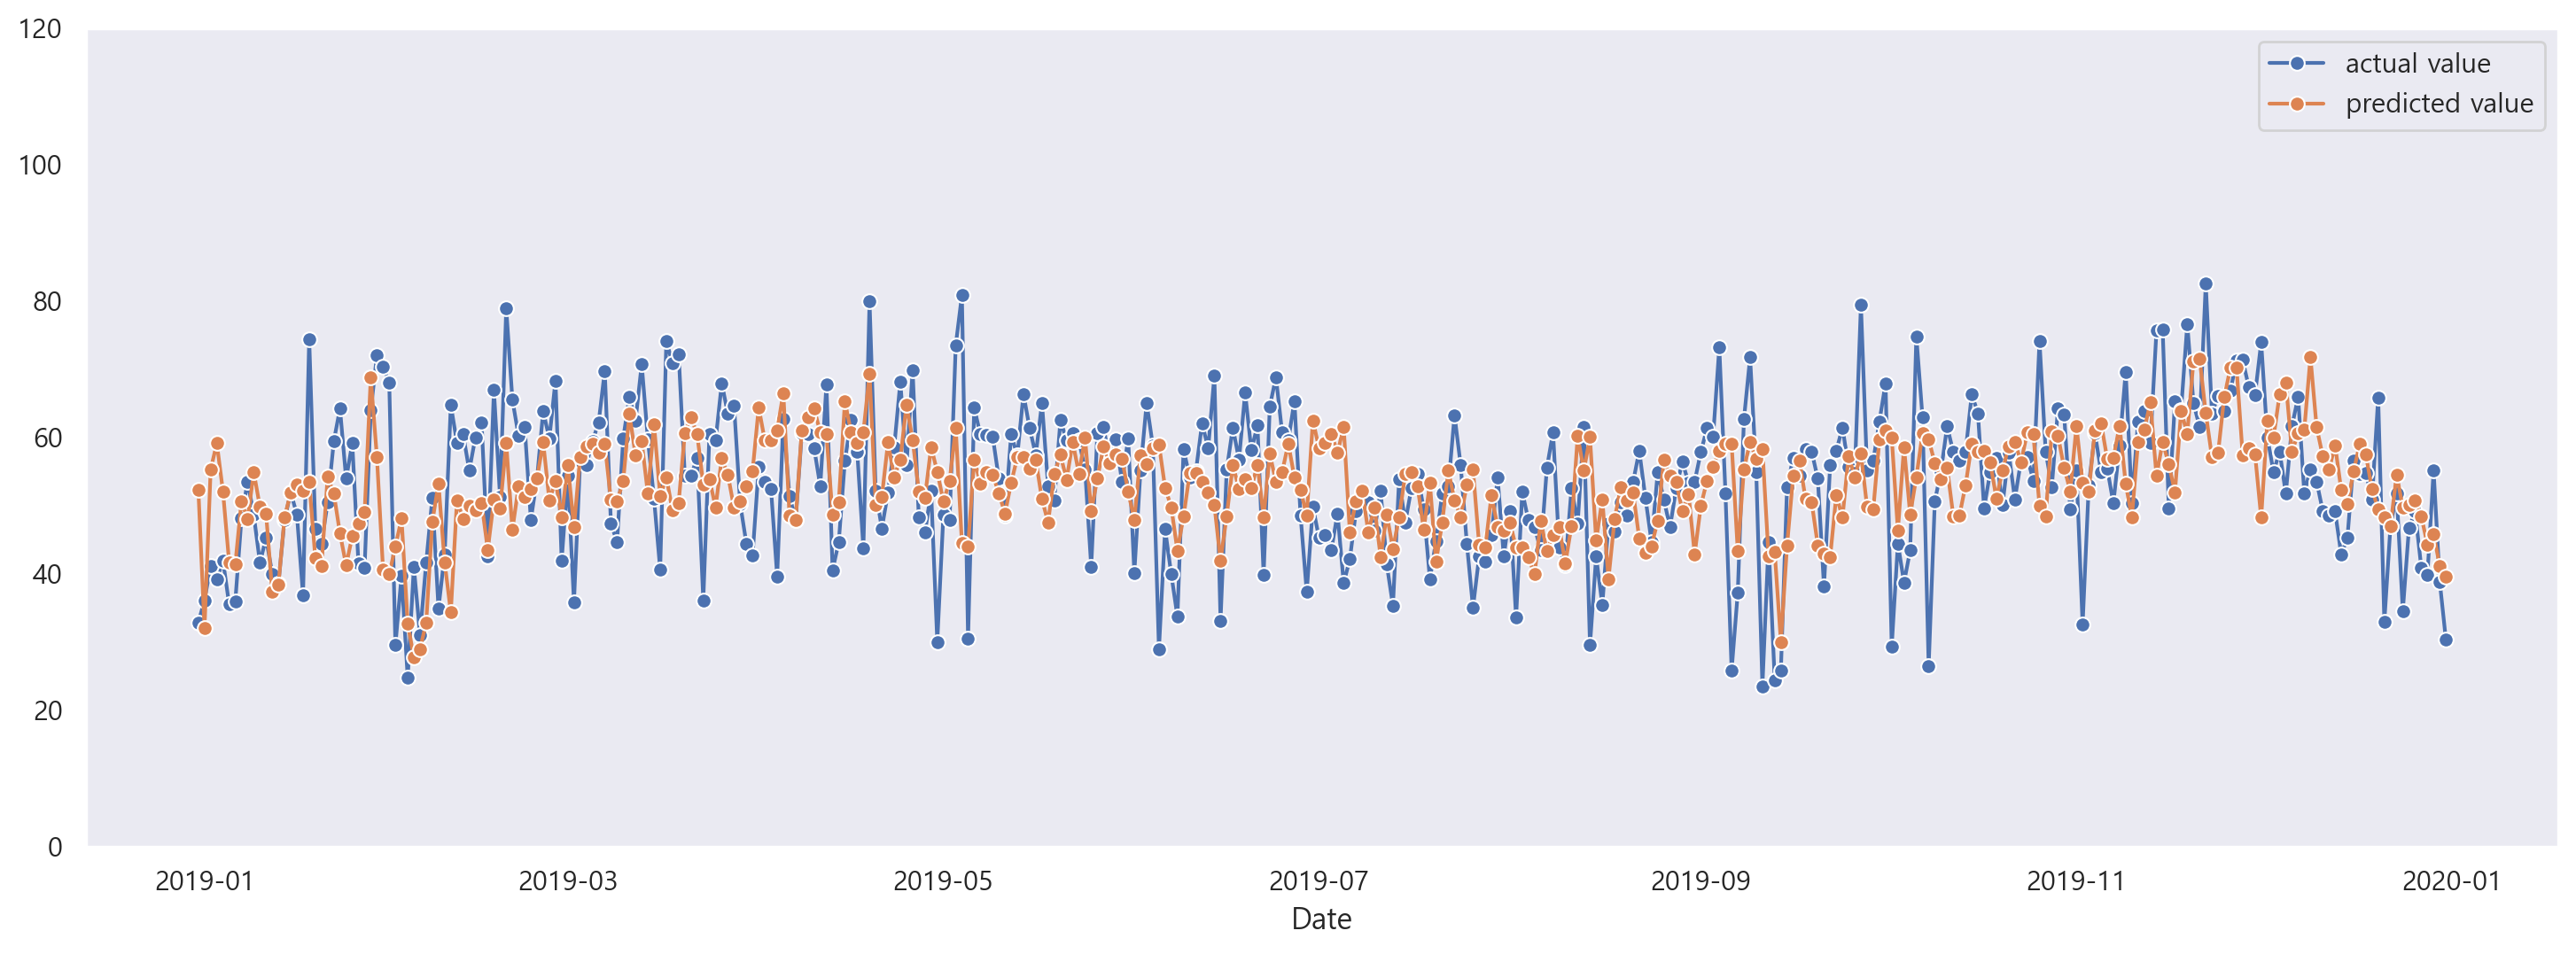

========== GradientBoostingRegressor ==============================
MAPE :  0.1657211108076968
MAE :  7.94852
R2 :  0.13972


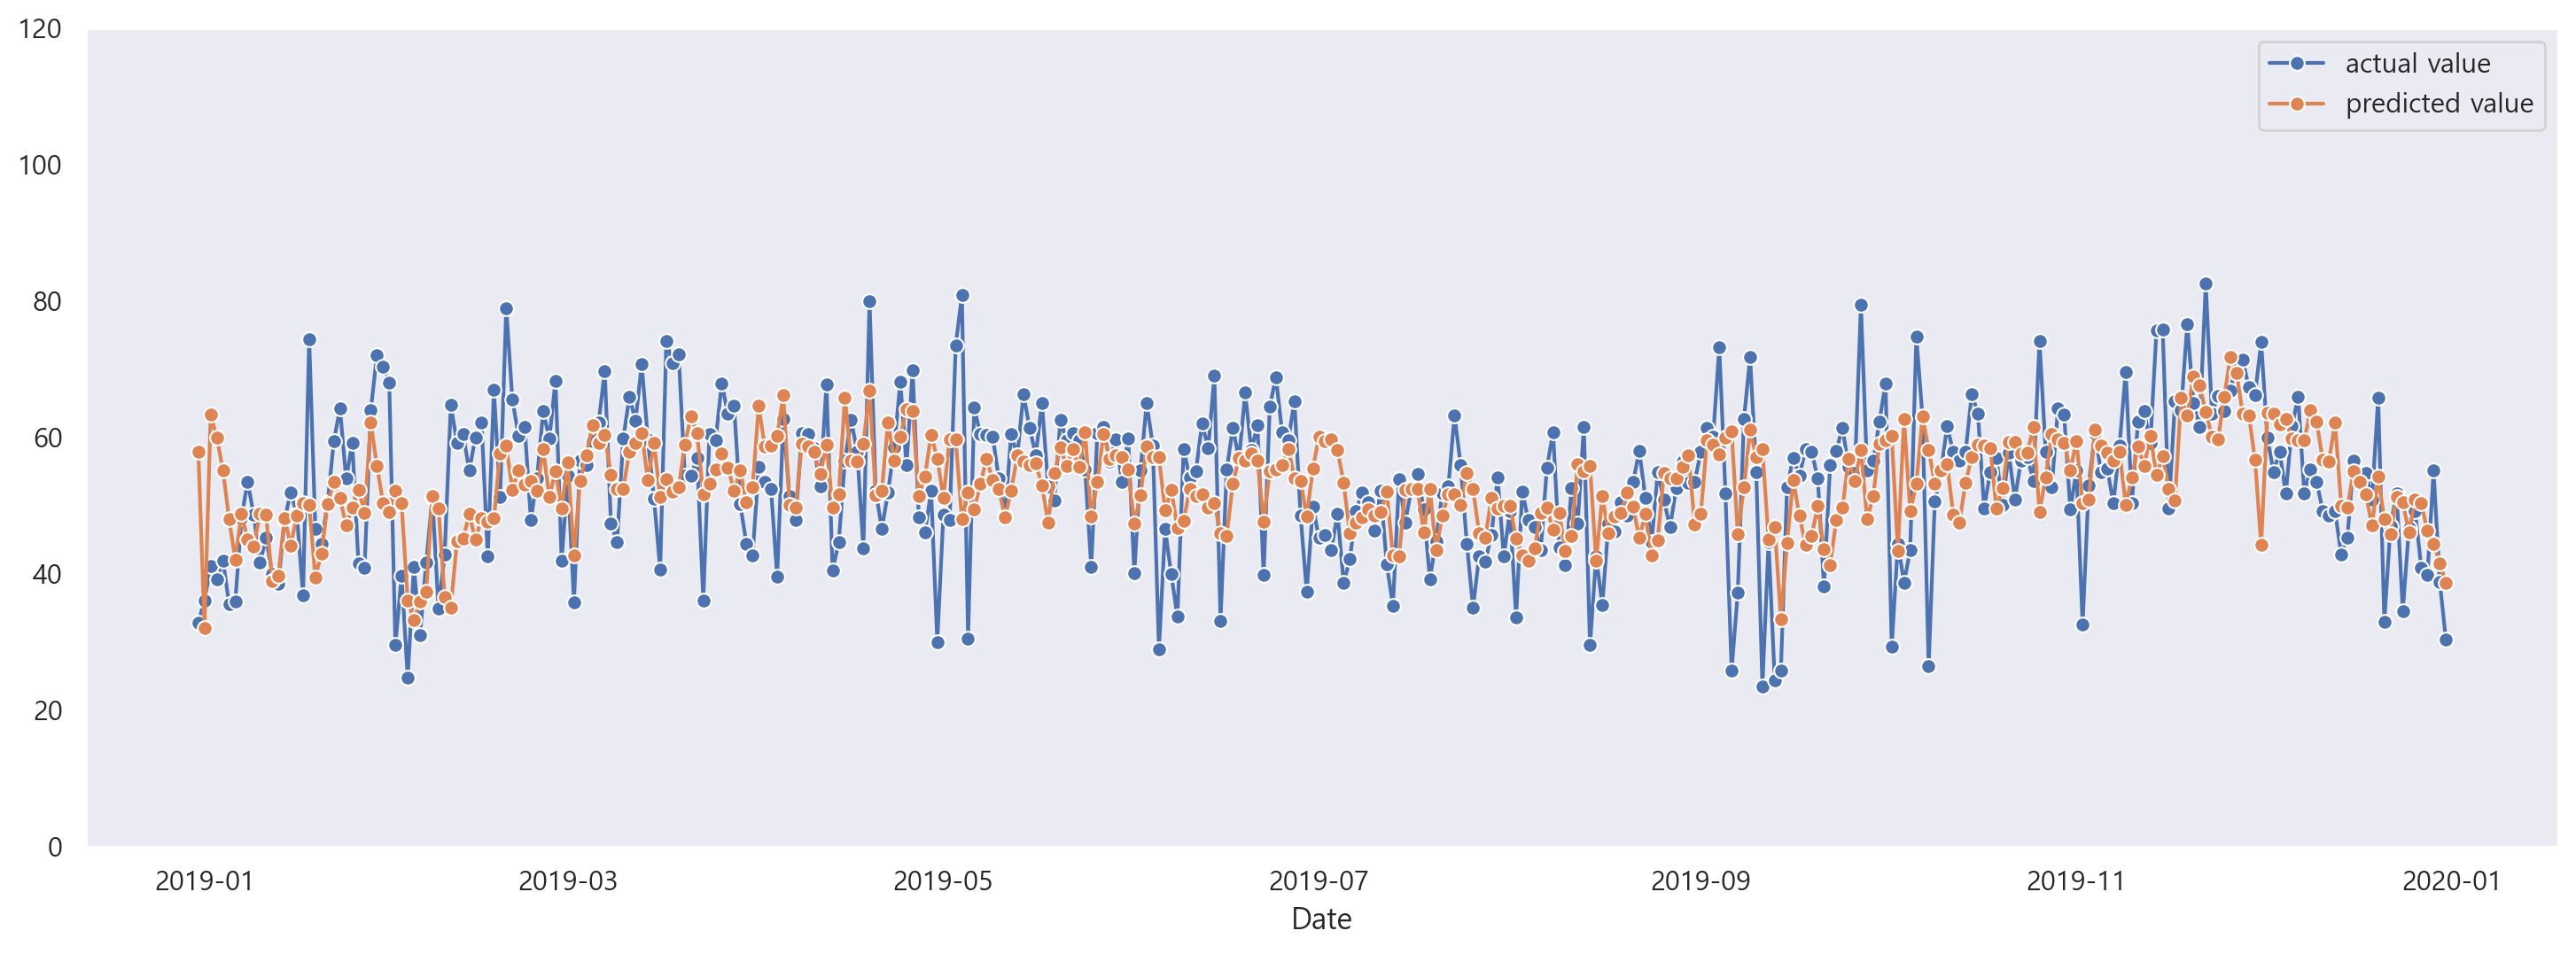

========== XGBRegressor ==============================
MAPE :  0.18375368735912406
MAE :  8.97107
R2 :  -0.10646


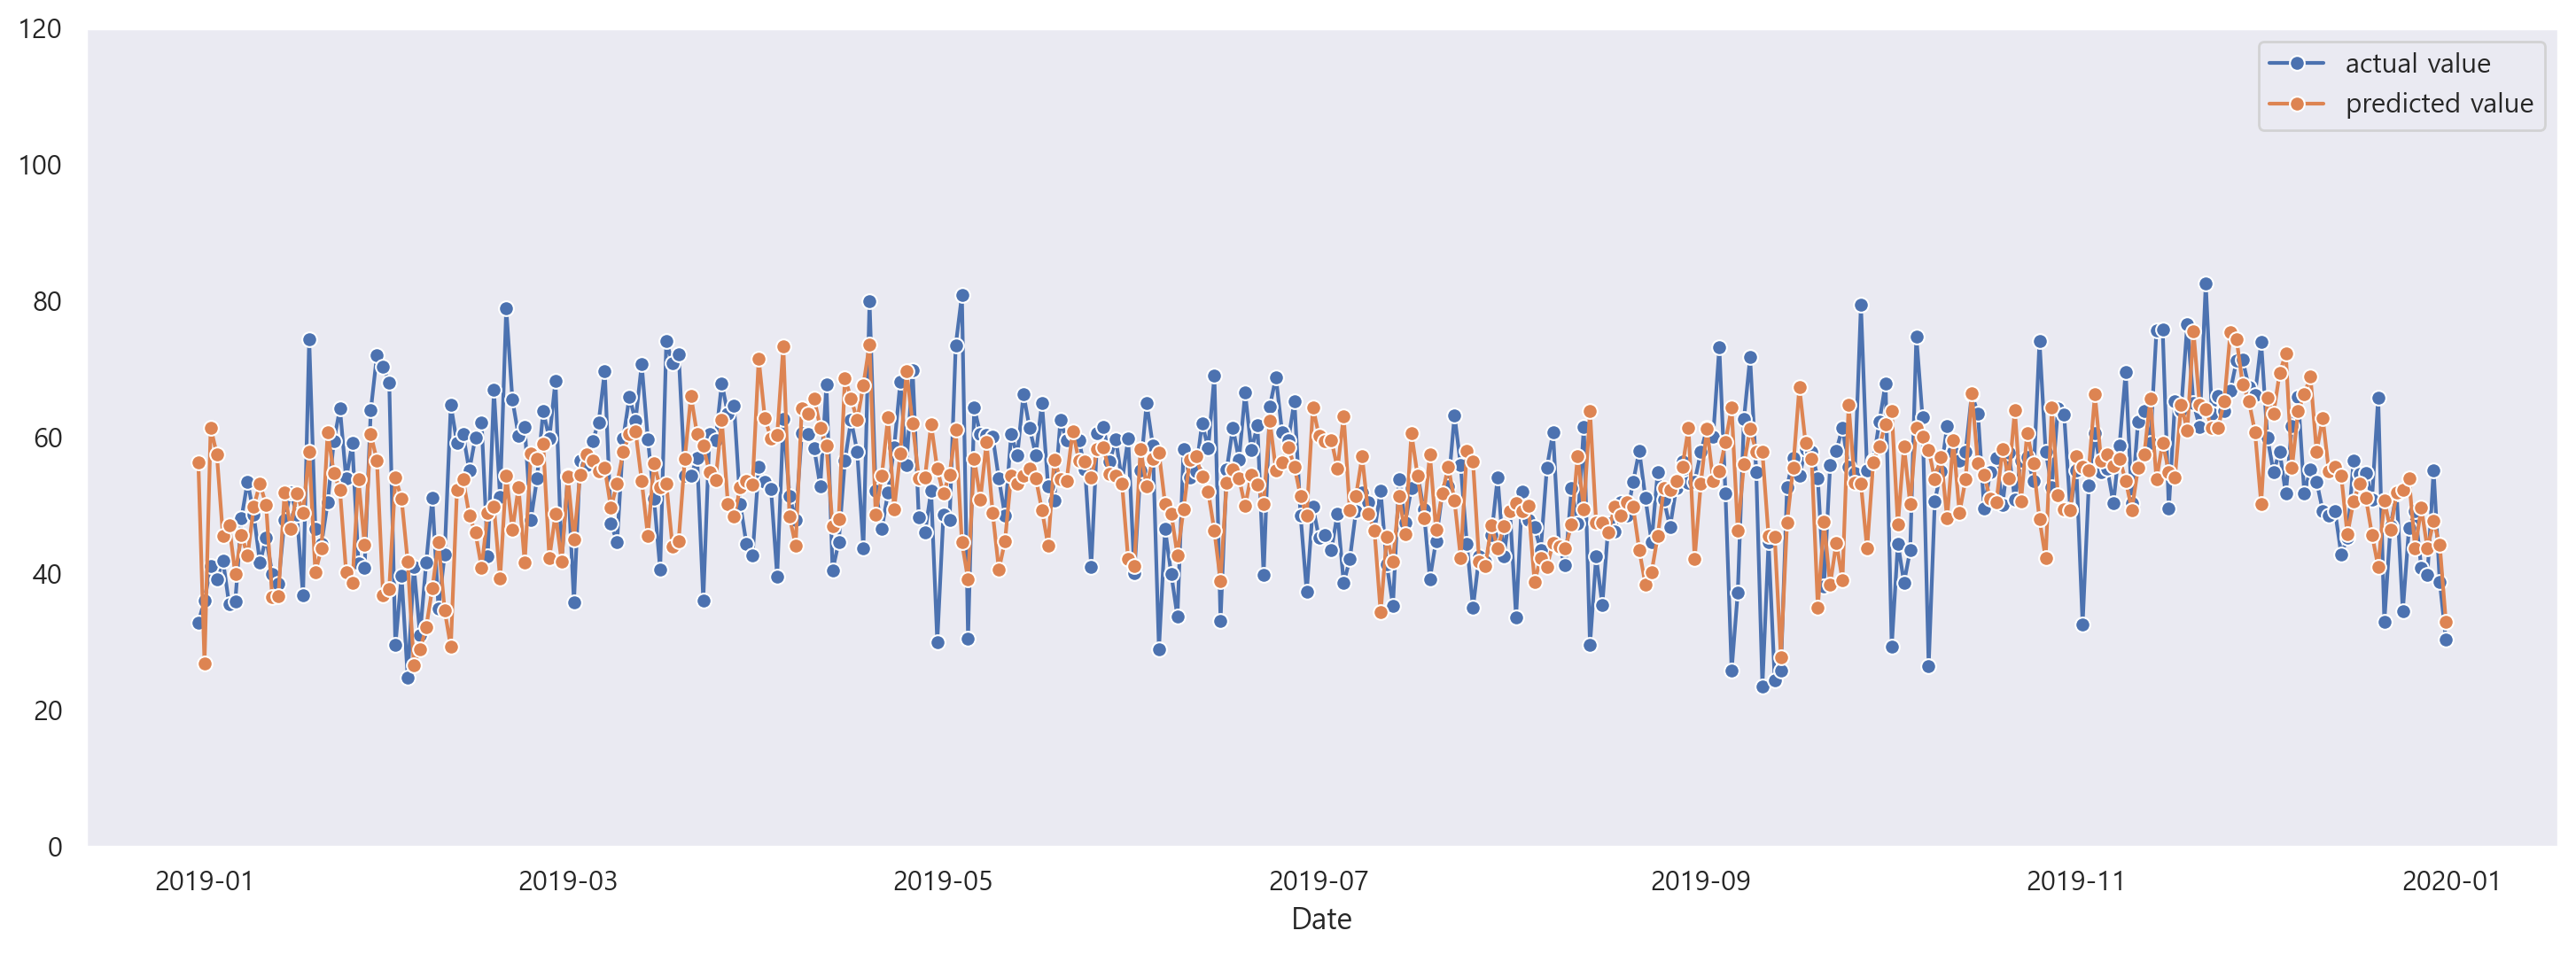

========== LGBMRegressor ==============================
MAPE :  0.17896867503366018
MAE :  8.77604
R2 :  -0.00141


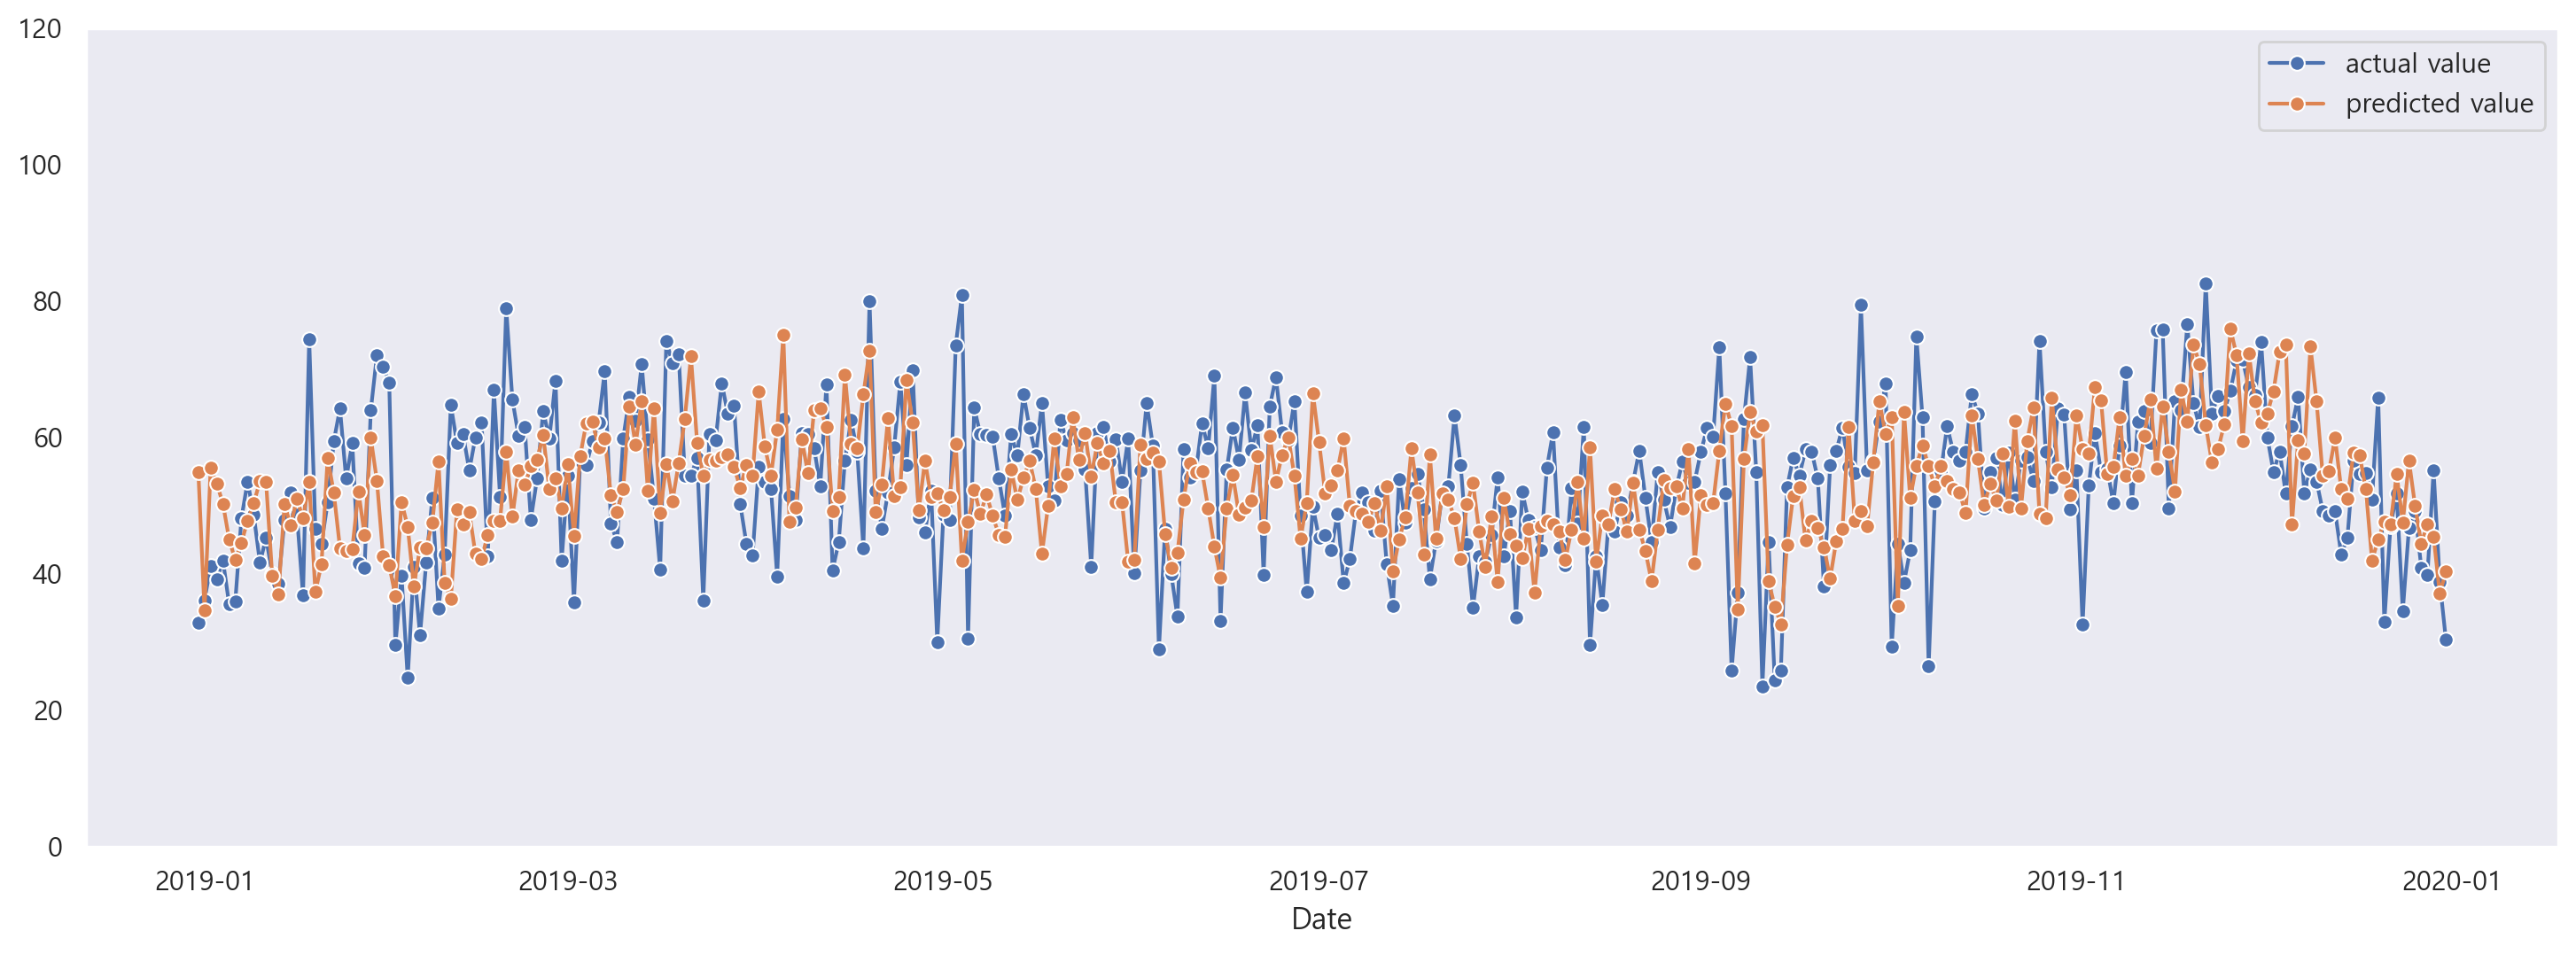

In [178]:
create_model(models, model_name, x_tr, x_val, y_tr, y_val, x_train_s, x_test_s)

In [179]:
def check_test(model, model_name, x_test):
    for model, model_name in zip(models, model_name):
        model = joblib.load(model_name + '.pkl')
        y_pred = model.predict(x_test)
        print('=' * 10, model_name, '=' * 30)
        print('MAPE : ', mean_absolute_percentage_error(y_test, y_pred))
        print('MAE : ', mean_absolute_error(y_test, y_pred).round(5))
        print('R2 : ', r2_score(y_test, y_pred).round(5))

In [180]:
check_test(models, model_name, x_test)

========== KNeighborsRegressor ==============================
MAPE :  0.25460363310961537
MAE :  15.07814
R2 :  -0.85387
========== LinearRegression ==============================
MAPE :  0.18236301727267154
MAE :  8.86216
R2 :  0.2384
========== Lasso ==============================
MAPE :  0.18536092745420588
MAE :  9.01042
R2 :  0.22247
========== Ridge ==============================
MAPE :  0.1816692137642816
MAE :  8.8442
R2 :  0.24031
========== DecisionTreeRegressor ==============================
MAPE :  0.1455740303122243
MAE :  7.20255
R2 :  0.2665
========== RandomForestRegressor ==============================
MAPE :  0.1342658960401794
MAE :  6.62582
R2 :  0.54161
========== GradientBoostingRegressor ==============================
MAPE :  0.15174979948274467
MAE :  7.49852
R2 :  0.46837
========== XGBRegressor ==============================
MAPE :  0.12626201252328662
MAE :  6.19248
R2 :  0.48273
========== LGBMRegressor ==============================
MAPE :  0.14753926350944

In [97]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model_LR = LinearRegression()
model_KN = KNeighborsRegressor()
model_DTR = DTR(max_depth=5)
model_RFR = RFR()
model_XGB = XGBRegressor()
model_LGB = LGBMRegressor(verbose=-1)

In [77]:
cv_score_LR = cross_val_score(model_LR, x_train, y_train, cv=10)
cv_score_KN = cross_val_score(model_KN, x_train_s, y_train, cv=10)
cv_score_DTR = cross_val_score(model_DTR, x_train, y_train, cv=10)
cv_score_RFR = cross_val_score(model_RFR, x_train, y_train, cv=10)
cv_score_XGB = cross_val_score(model_XGB, x_train, y_train, cv=10)
cv_score_LGB = cross_val_score(model_LGB, x_train, y_train, cv=10)

In [98]:
print('LR', cv_score_LR.mean())
print('KN', cv_score_KN.mean())
print('DTR', cv_score_DTR.mean())
print('RFR', cv_score_RFR.mean())
print('XGB', cv_score_XGB.mean())
print('LGB', cv_score_LGB.mean())

LR 0.3544880933068429
KN 0.25876236534639024
DTR 0.1031170442485084
RFR 0.33483619113874524
XGB 0.28047690932472535
LGB 0.3019154911401986


In [99]:
result = {}
result['LinearRegression'] = (cv_score_LR.mean()).round(5)
result['KNeighborsRegressor'] = (cv_score_KN.mean()).round(5)
result['DecisionTreeRegressor'] = (cv_score_DTR.mean()).round(5)
result['RandomForestRegressor'] = (cv_score_RFR.mean()).round(5)
result['XGBRegressor'] = (cv_score_XGB.mean()).round(5)
result['LGBMRegressor'] = (cv_score_LGB.mean()).round(5)
result

{'LinearRegression': 0.35449,
 'KNeighborsRegressor': 0.25876,
 'DecisionTreeRegressor': 0.10312,
 'RandomForestRegressor': 0.33484,
 'XGBRegressor': 0.28048,
 'LGBMRegressor': 0.30192}

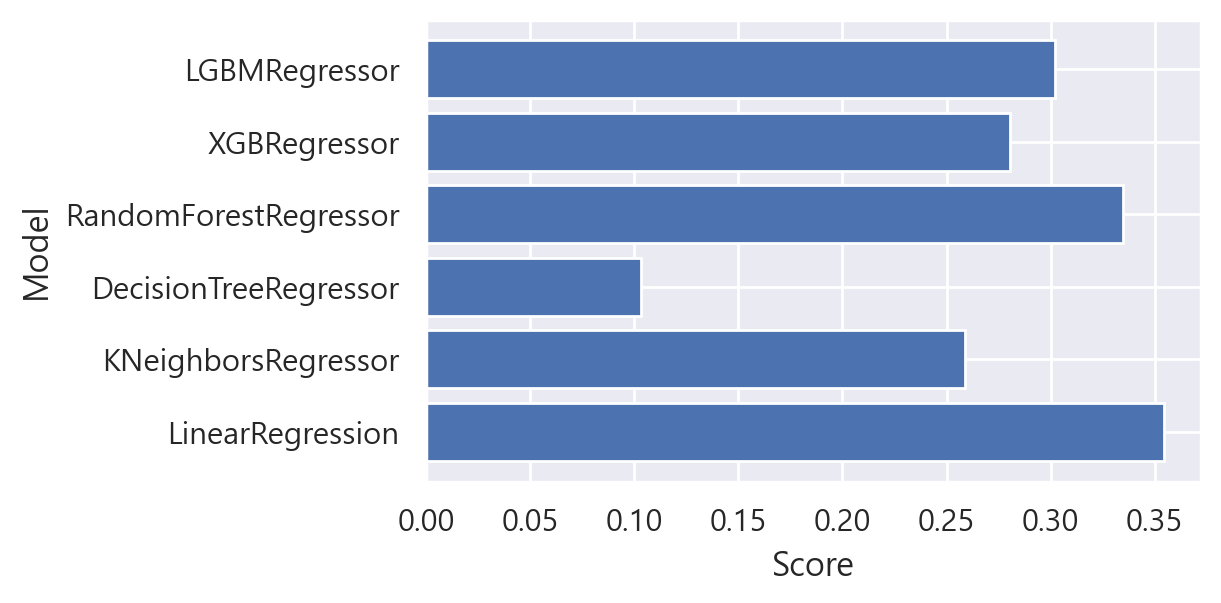

In [100]:
# 시각화
plt.figure(figsize=(5, 3))
plt.barh(list(result), result.values())
plt.xlabel('Score')
plt.ylabel('Model')
plt.show()

## 20 ~ 22

In [151]:
target = 'target'
x = data_20_22.drop(target, axis = 1)
y = data_20_22.loc[:, target]

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)

In [153]:
x_tr, x_val, y_tr, y_val = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)

In [155]:
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_tr)
x_test_s = scaler.fit_transform(x_val)

========== KNeighborsRegressor ==============================
MAPE :  0.16482402331489943
MAE :  6.90922
R2 :  -0.40797


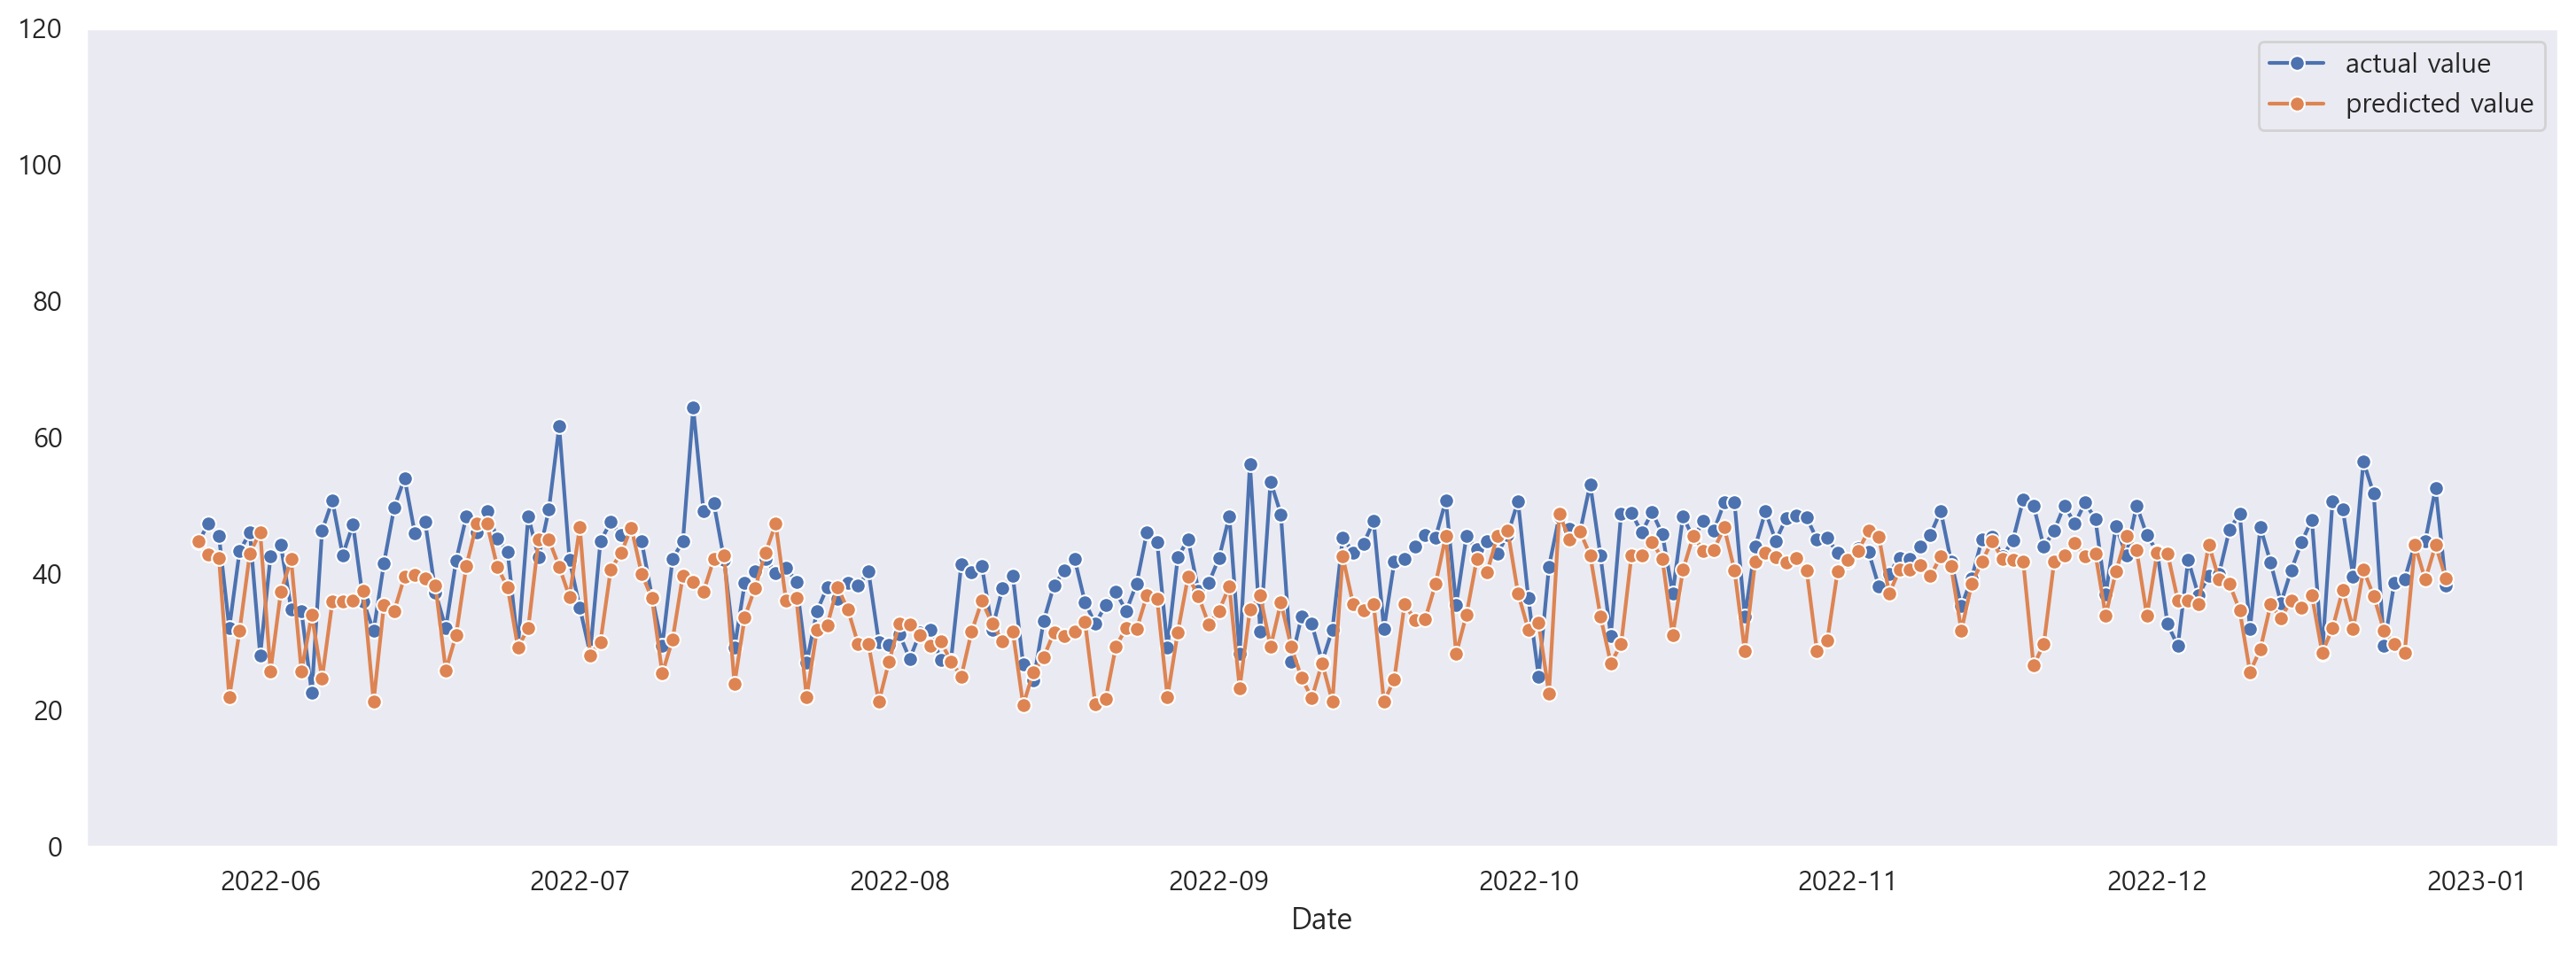

========== LinearRegression ==============================
MAPE :  0.1221118138907139
MAE :  4.82781
R2 :  0.24533


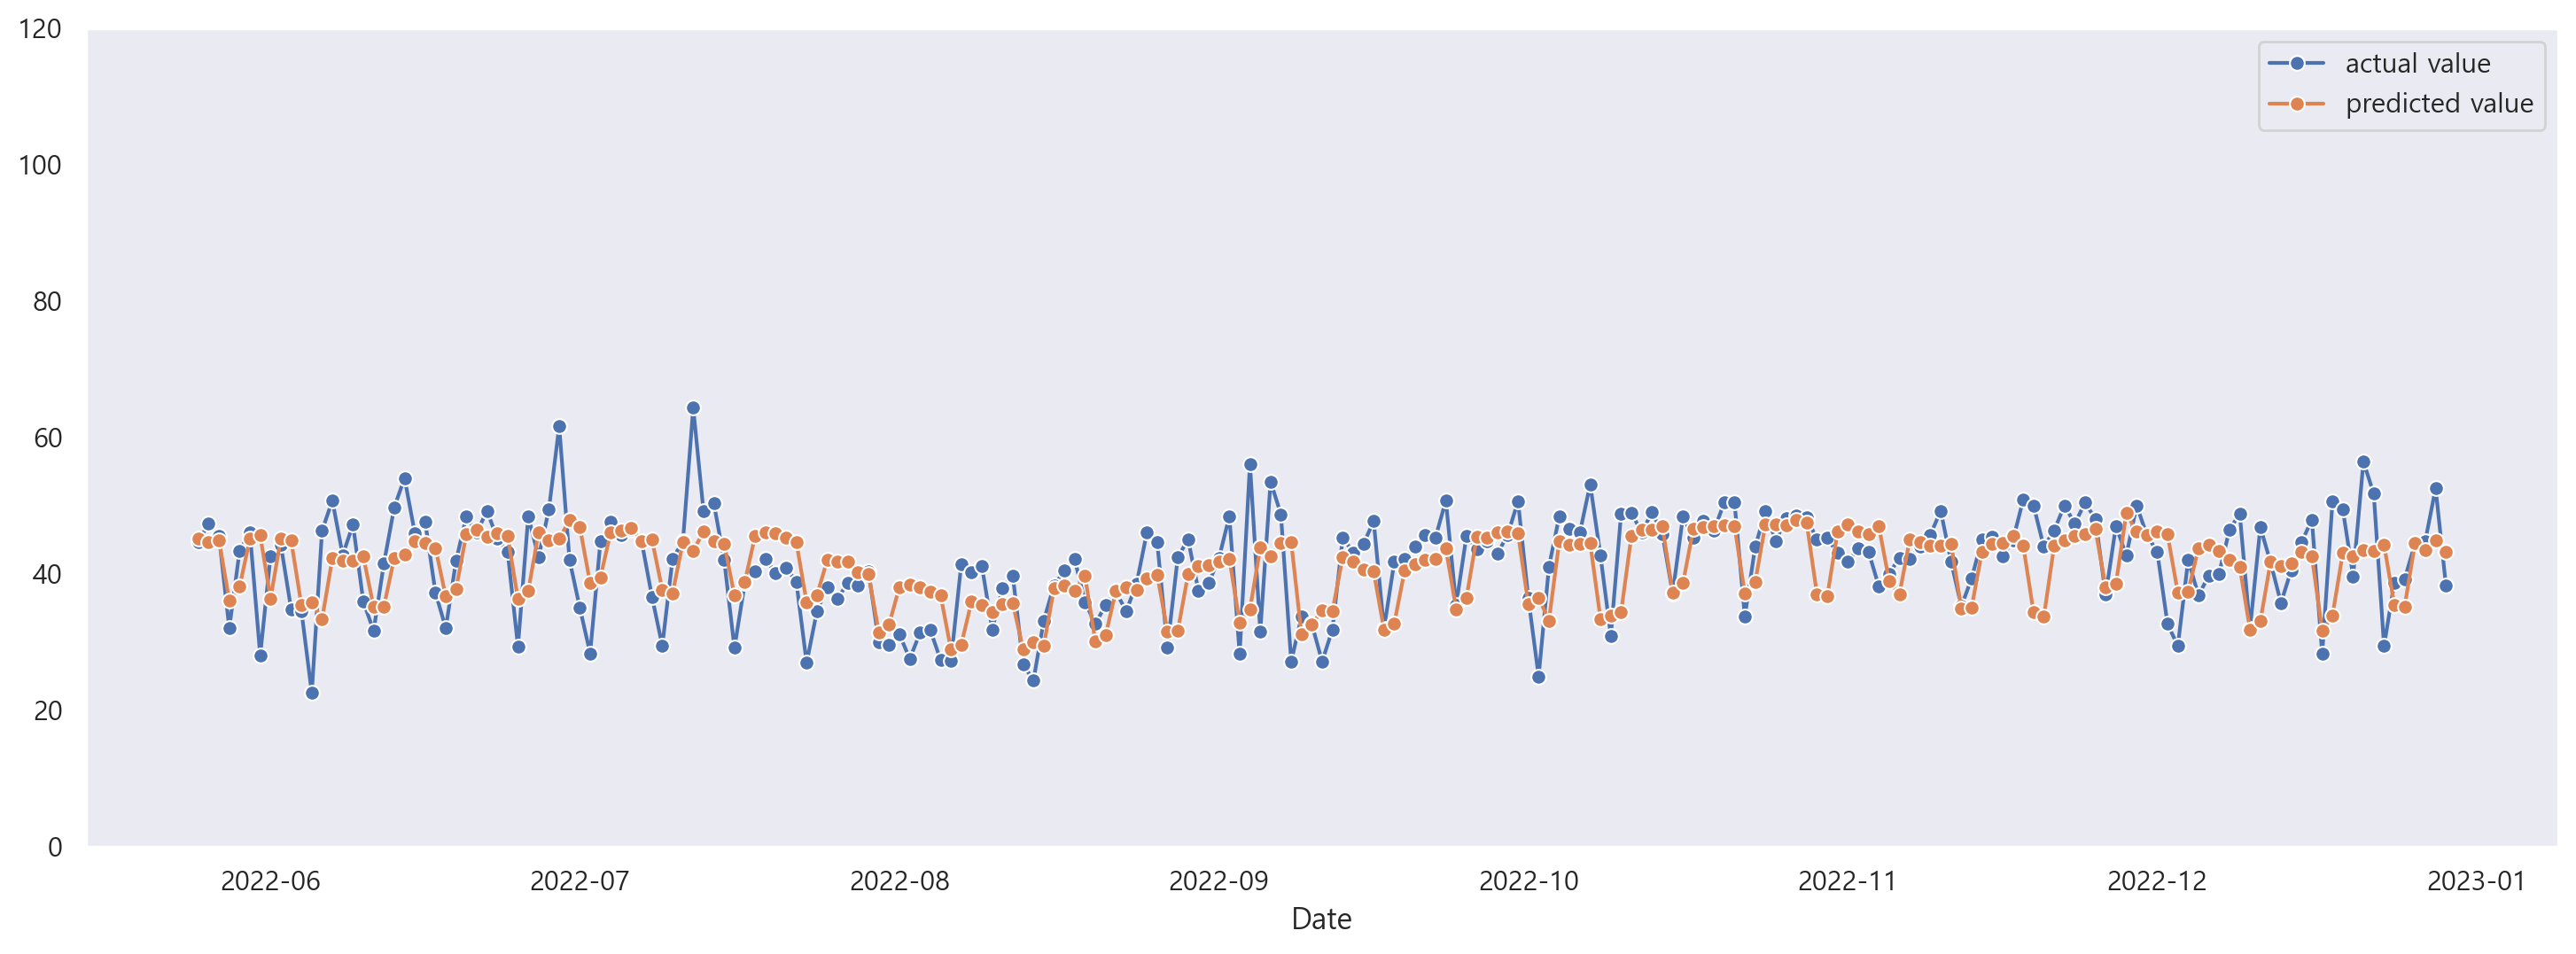

========== Lasso ==============================
MAPE :  0.12904103849652826
MAE :  5.0641
R2 :  0.23768


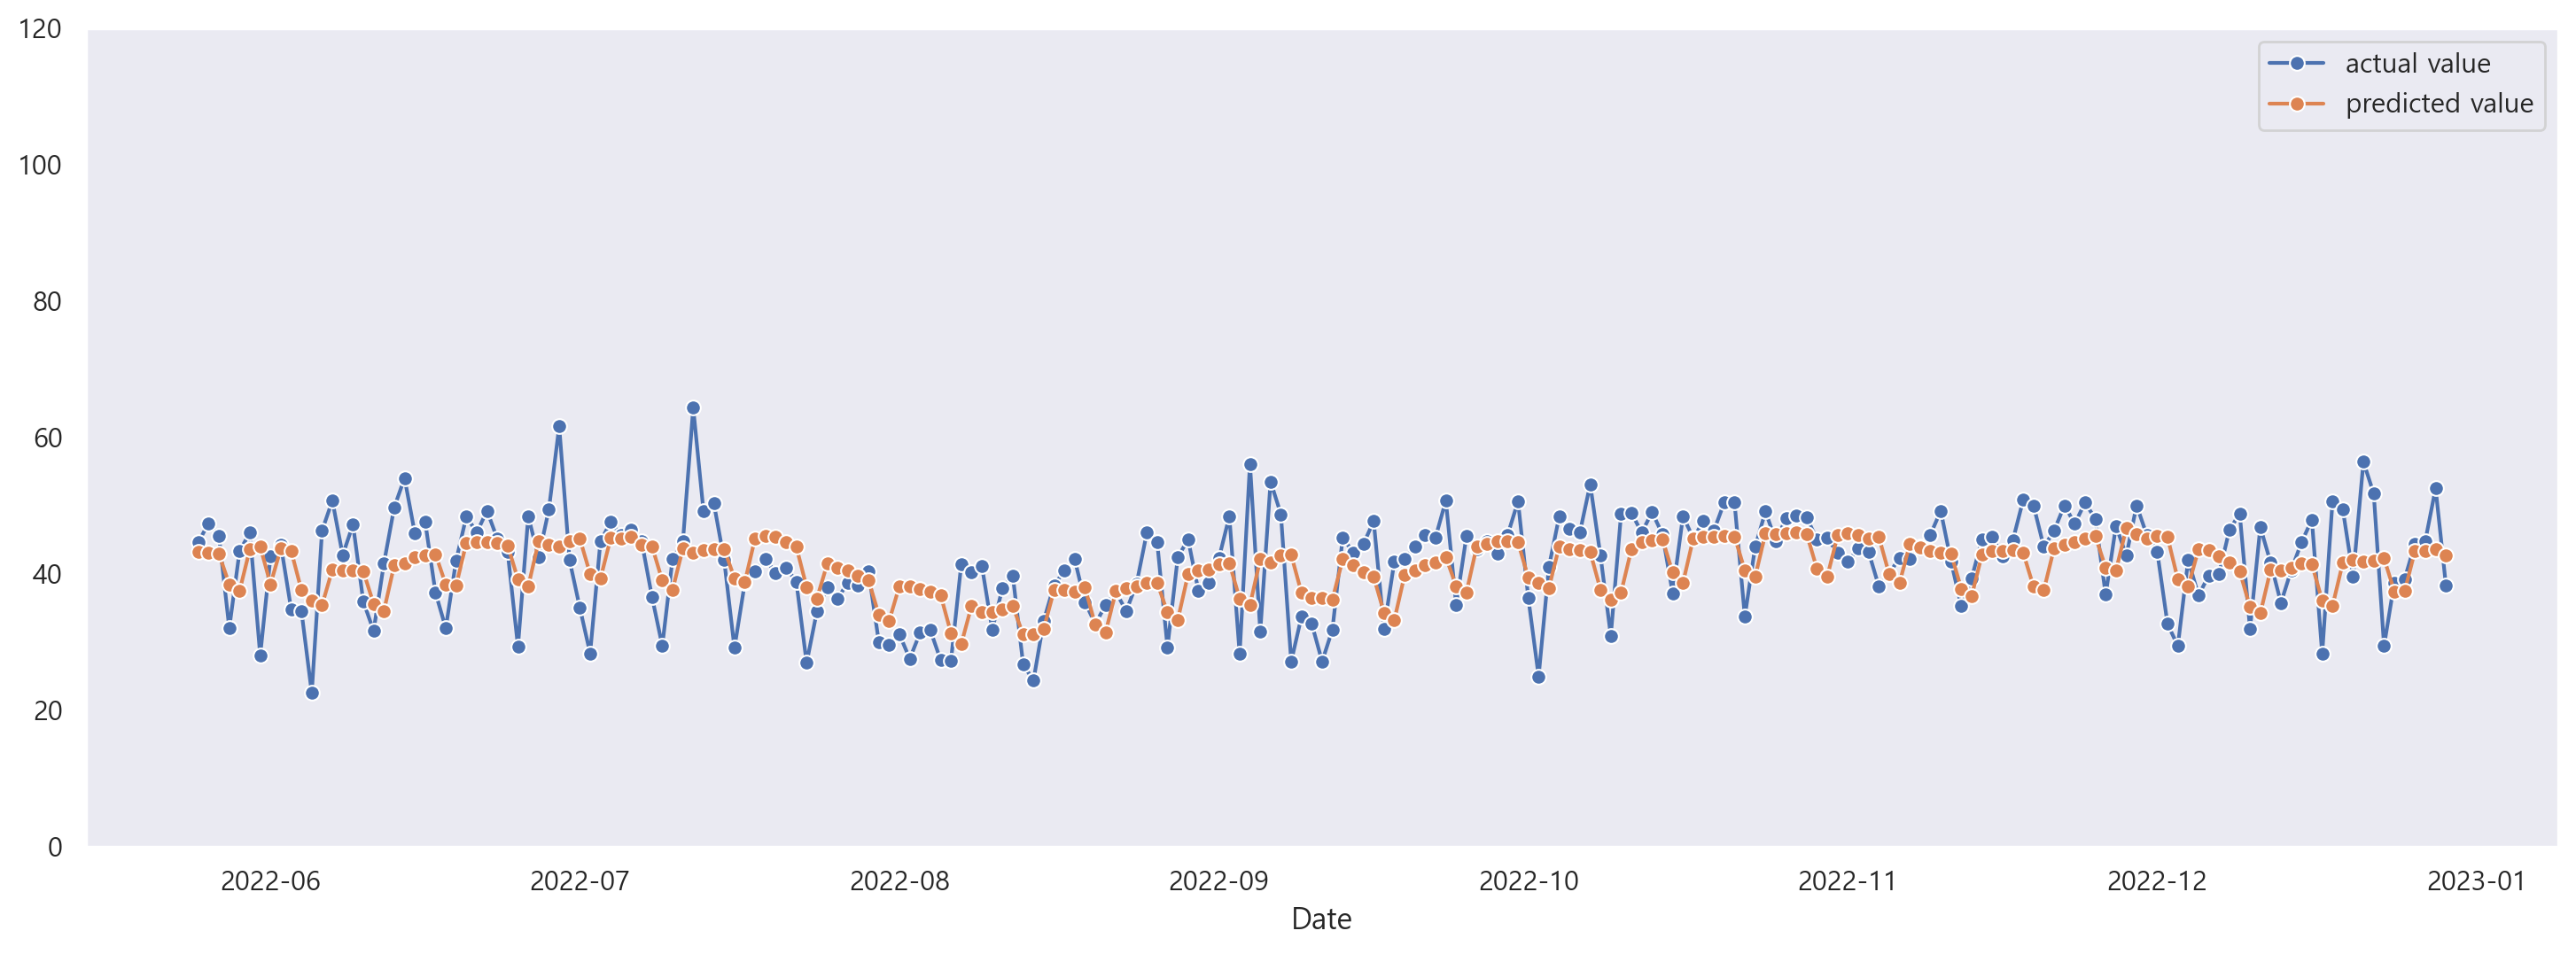

========== Ridge ==============================
MAPE :  0.12361413550477897
MAE :  4.82885
R2 :  0.25981


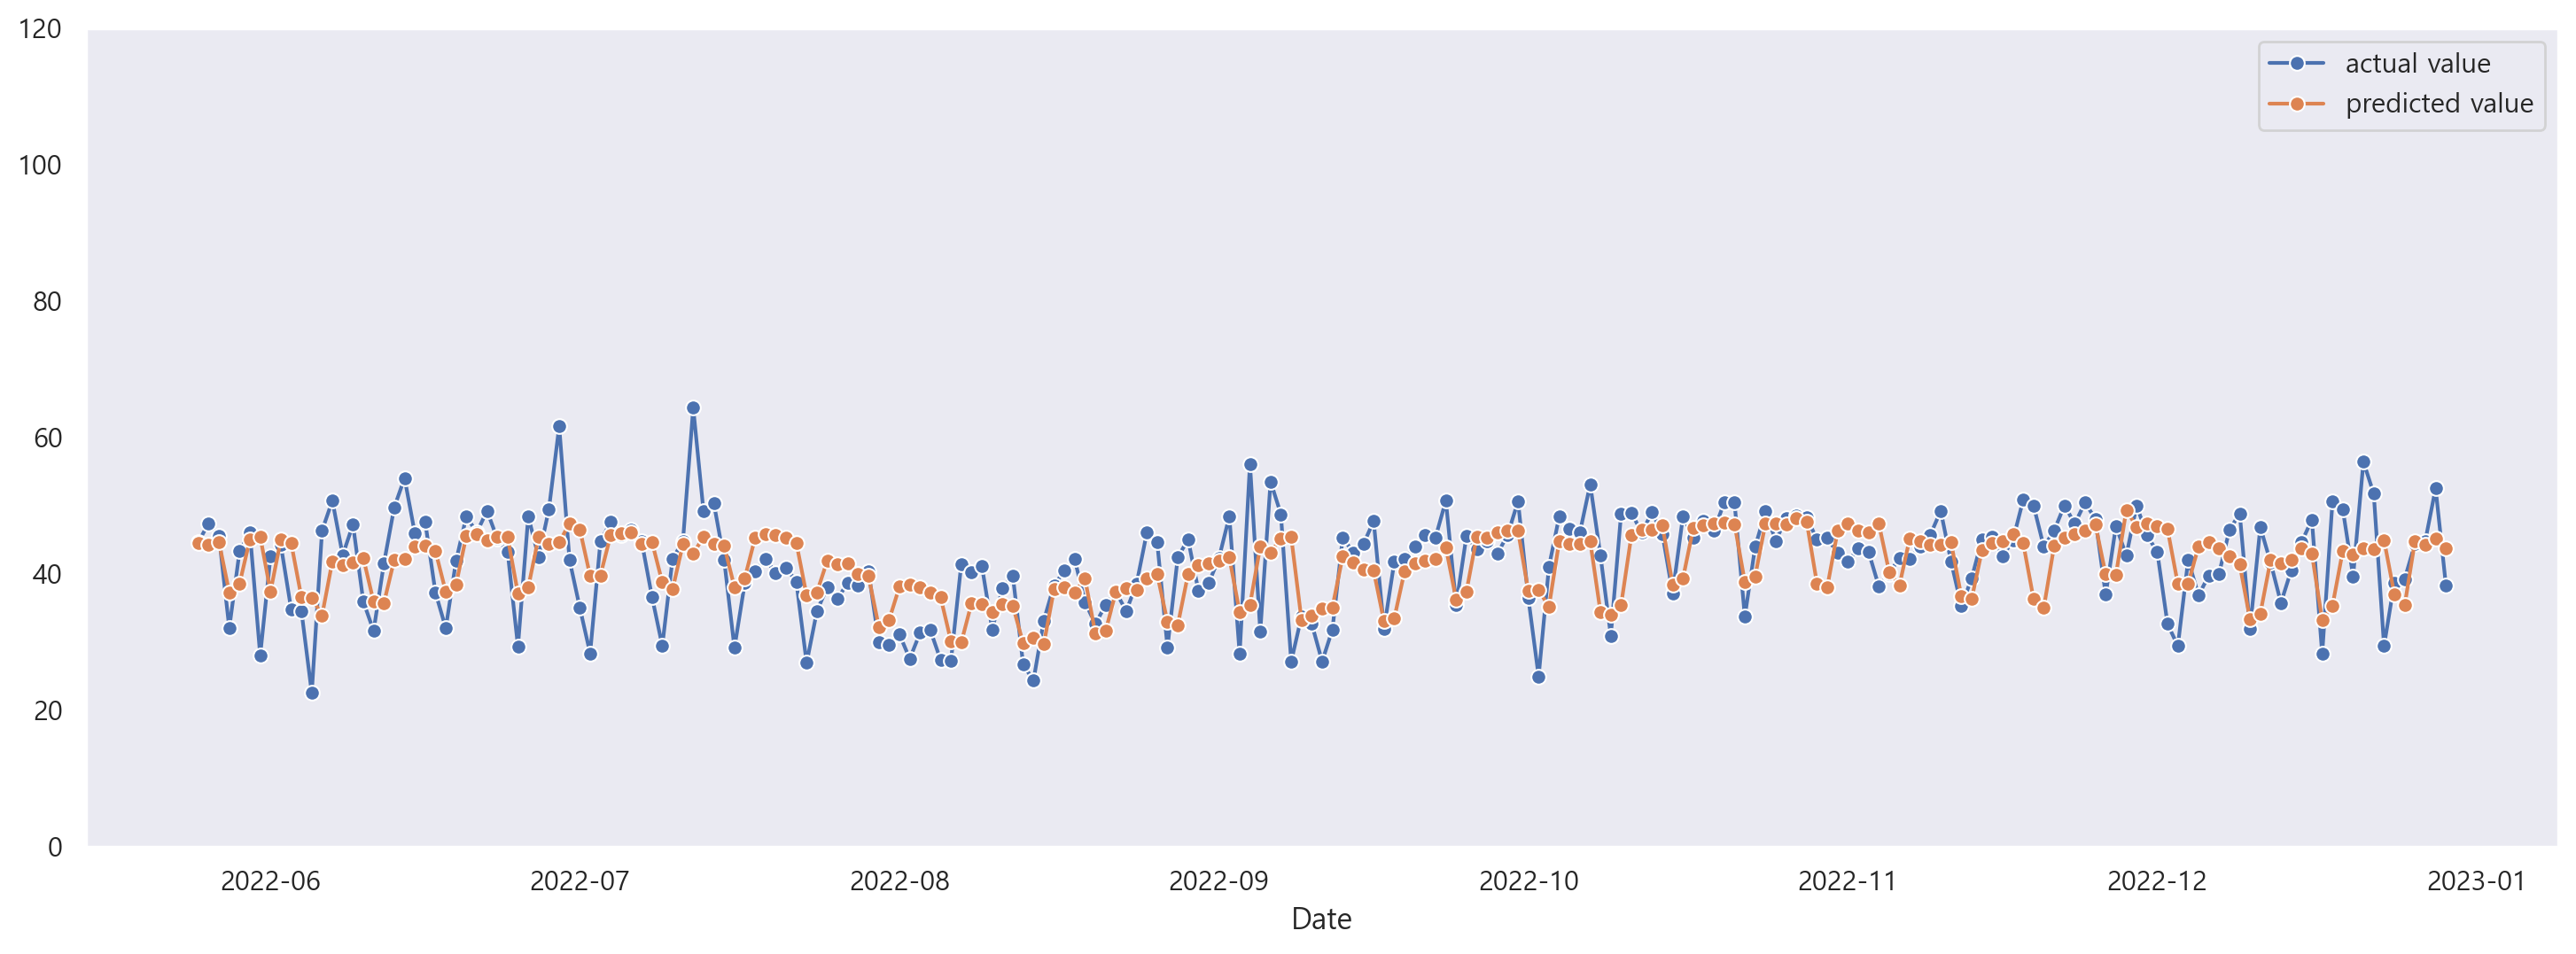

========== DecisionTreeRegressor ==============================
MAPE :  0.16962331758492927
MAE :  6.73333
R2 :  -0.55532


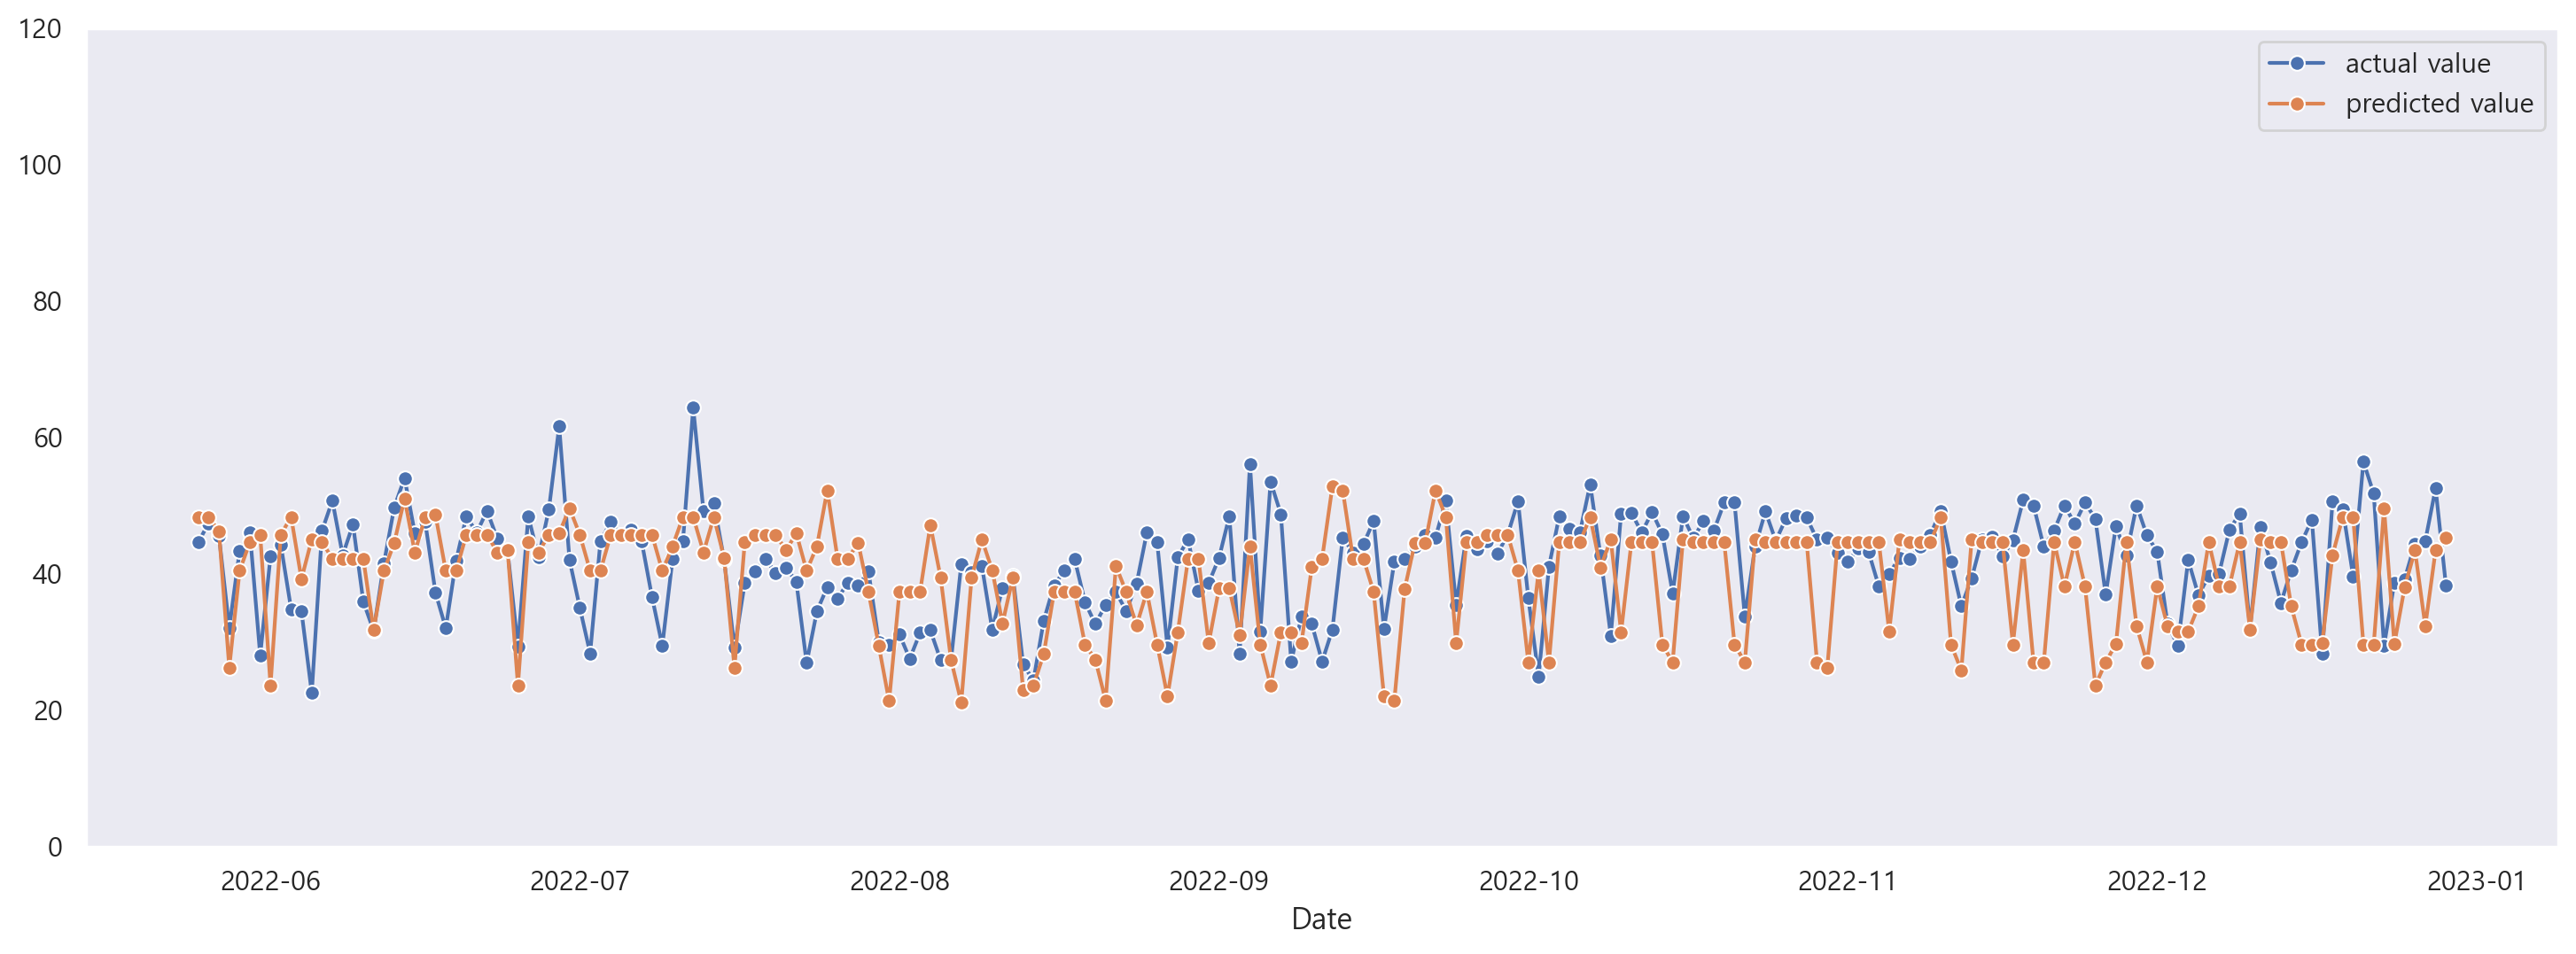

========== RandomForestRegressor ==============================
MAPE :  0.1351274156500011
MAE :  5.54615
R2 :  -0.03445


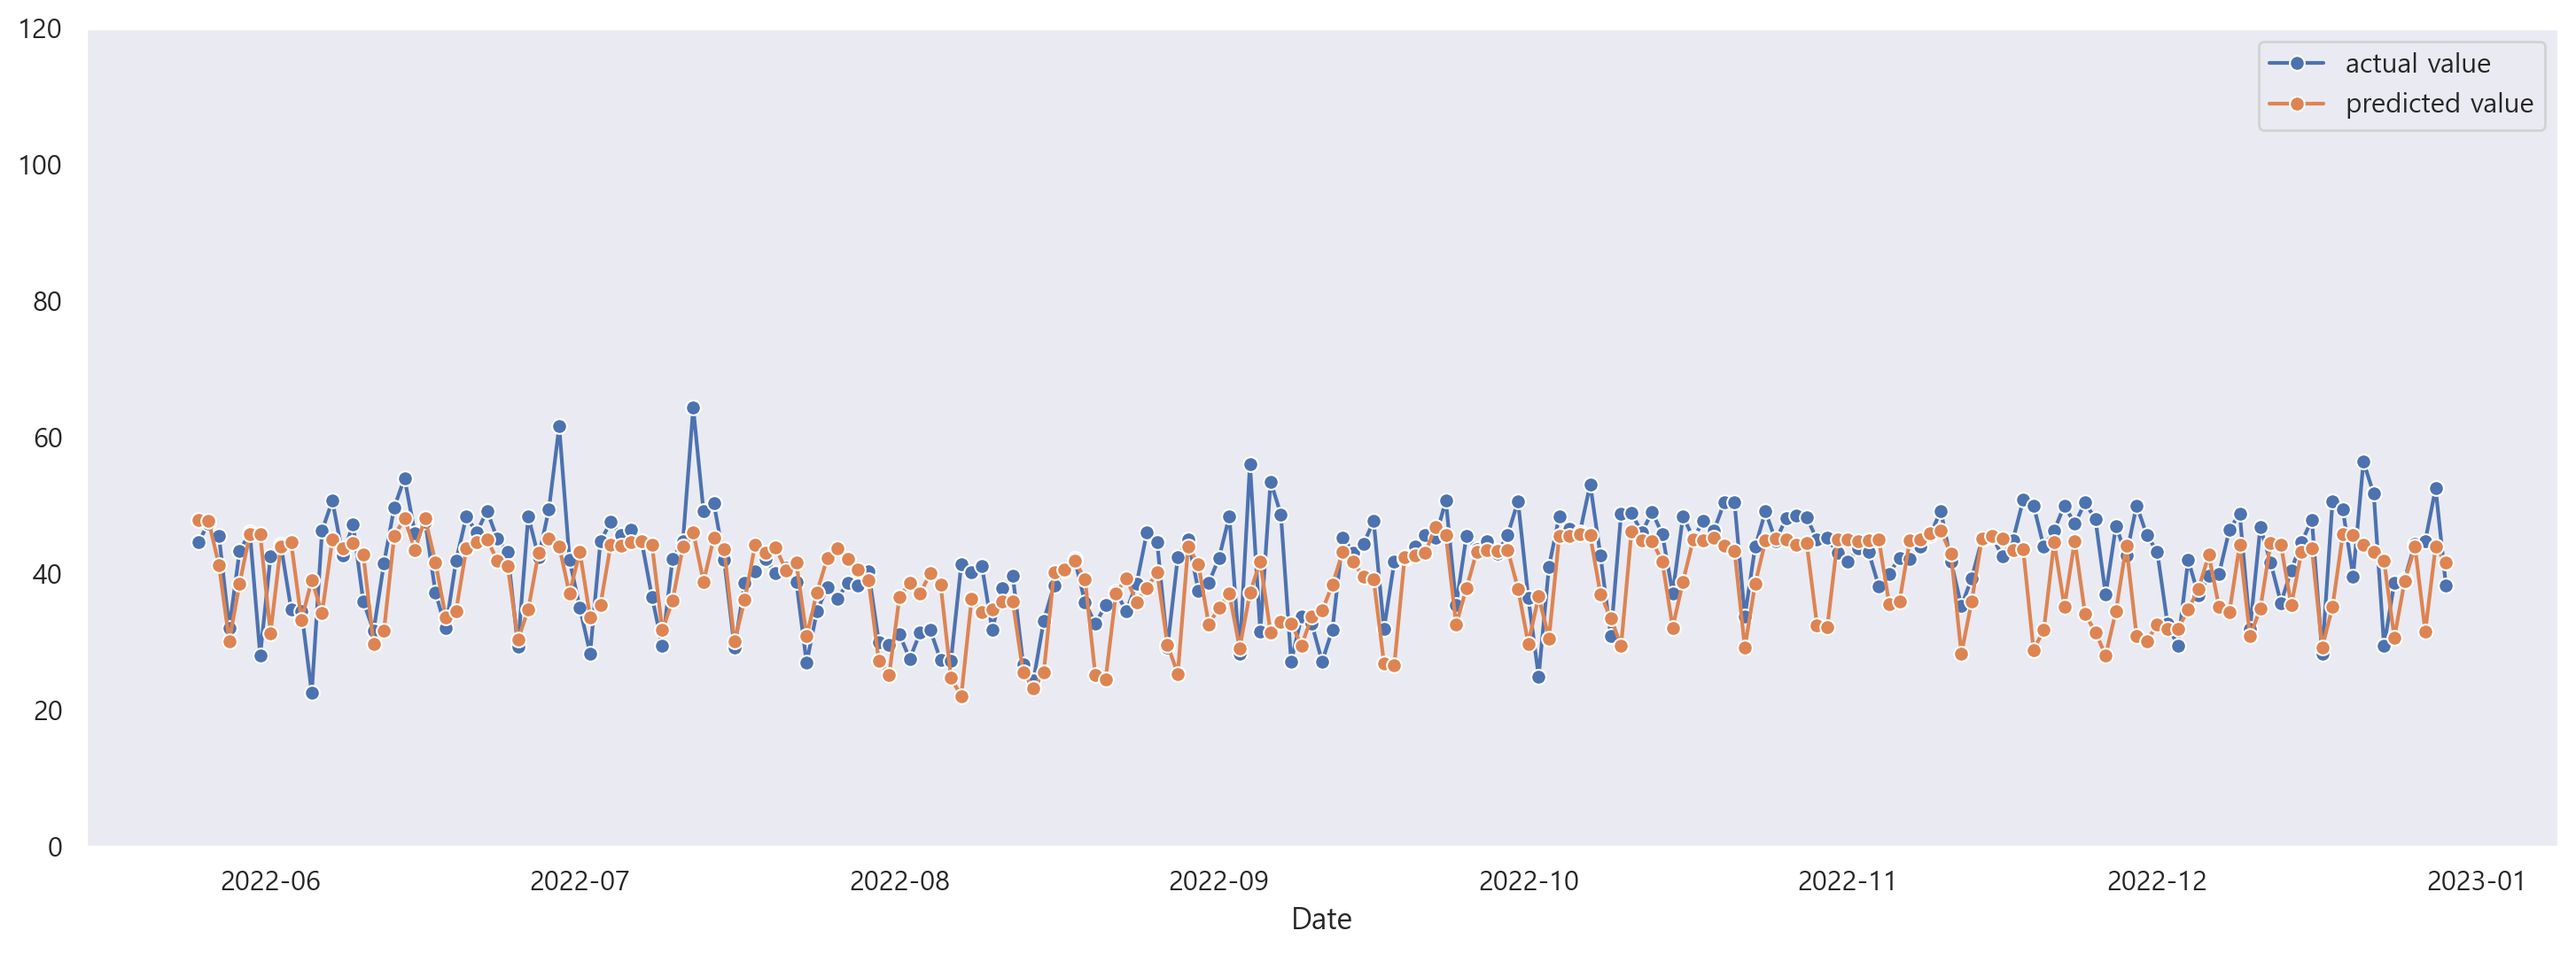

========== GradientBoostingRegressor ==============================
MAPE :  0.13579805893506997
MAE :  5.57388
R2 :  0.00584


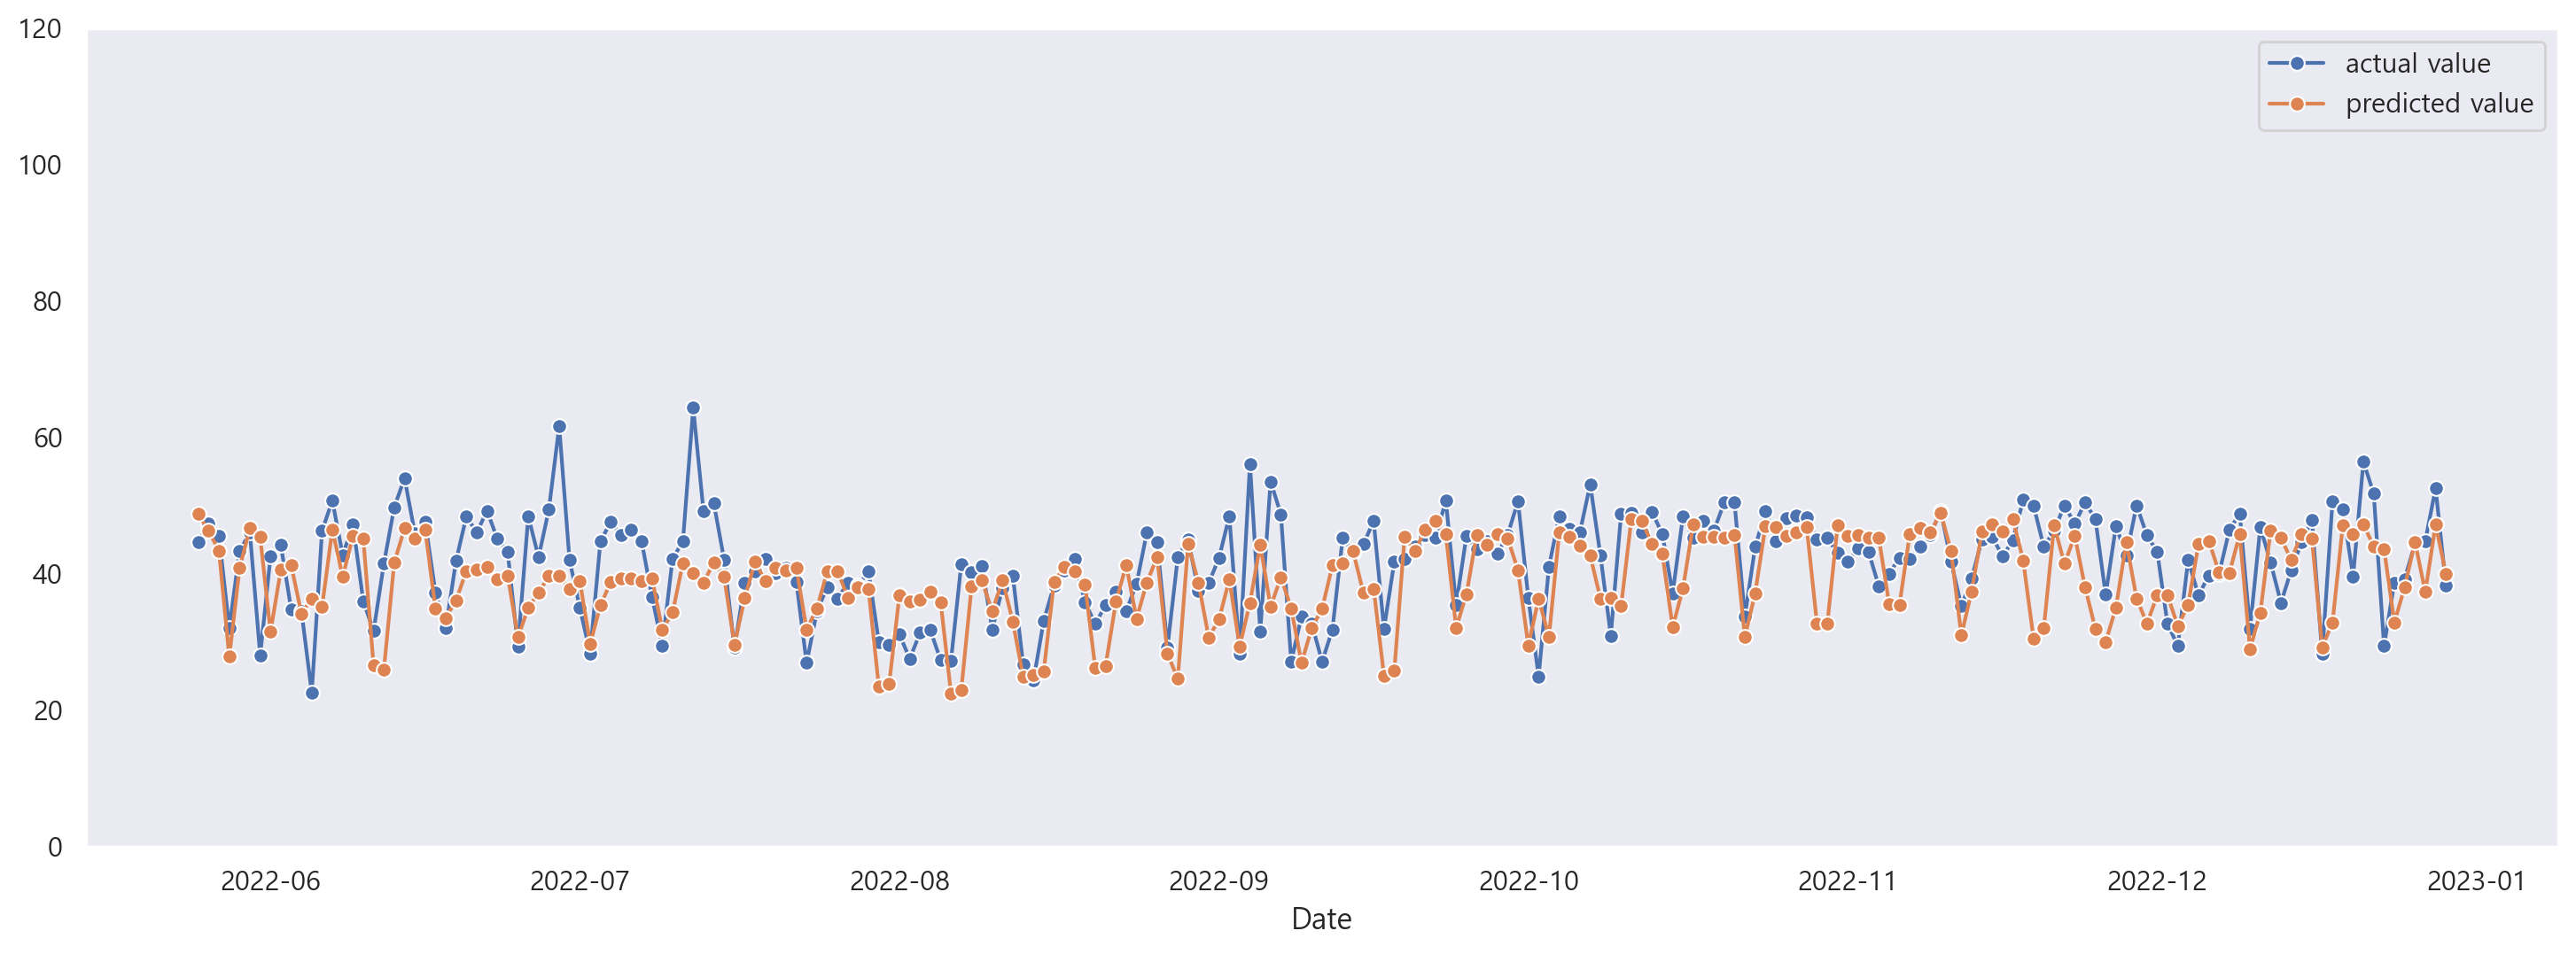

========== XGBRegressor ==============================
MAPE :  0.13927355277366343
MAE :  5.67824
R2 :  -0.08714


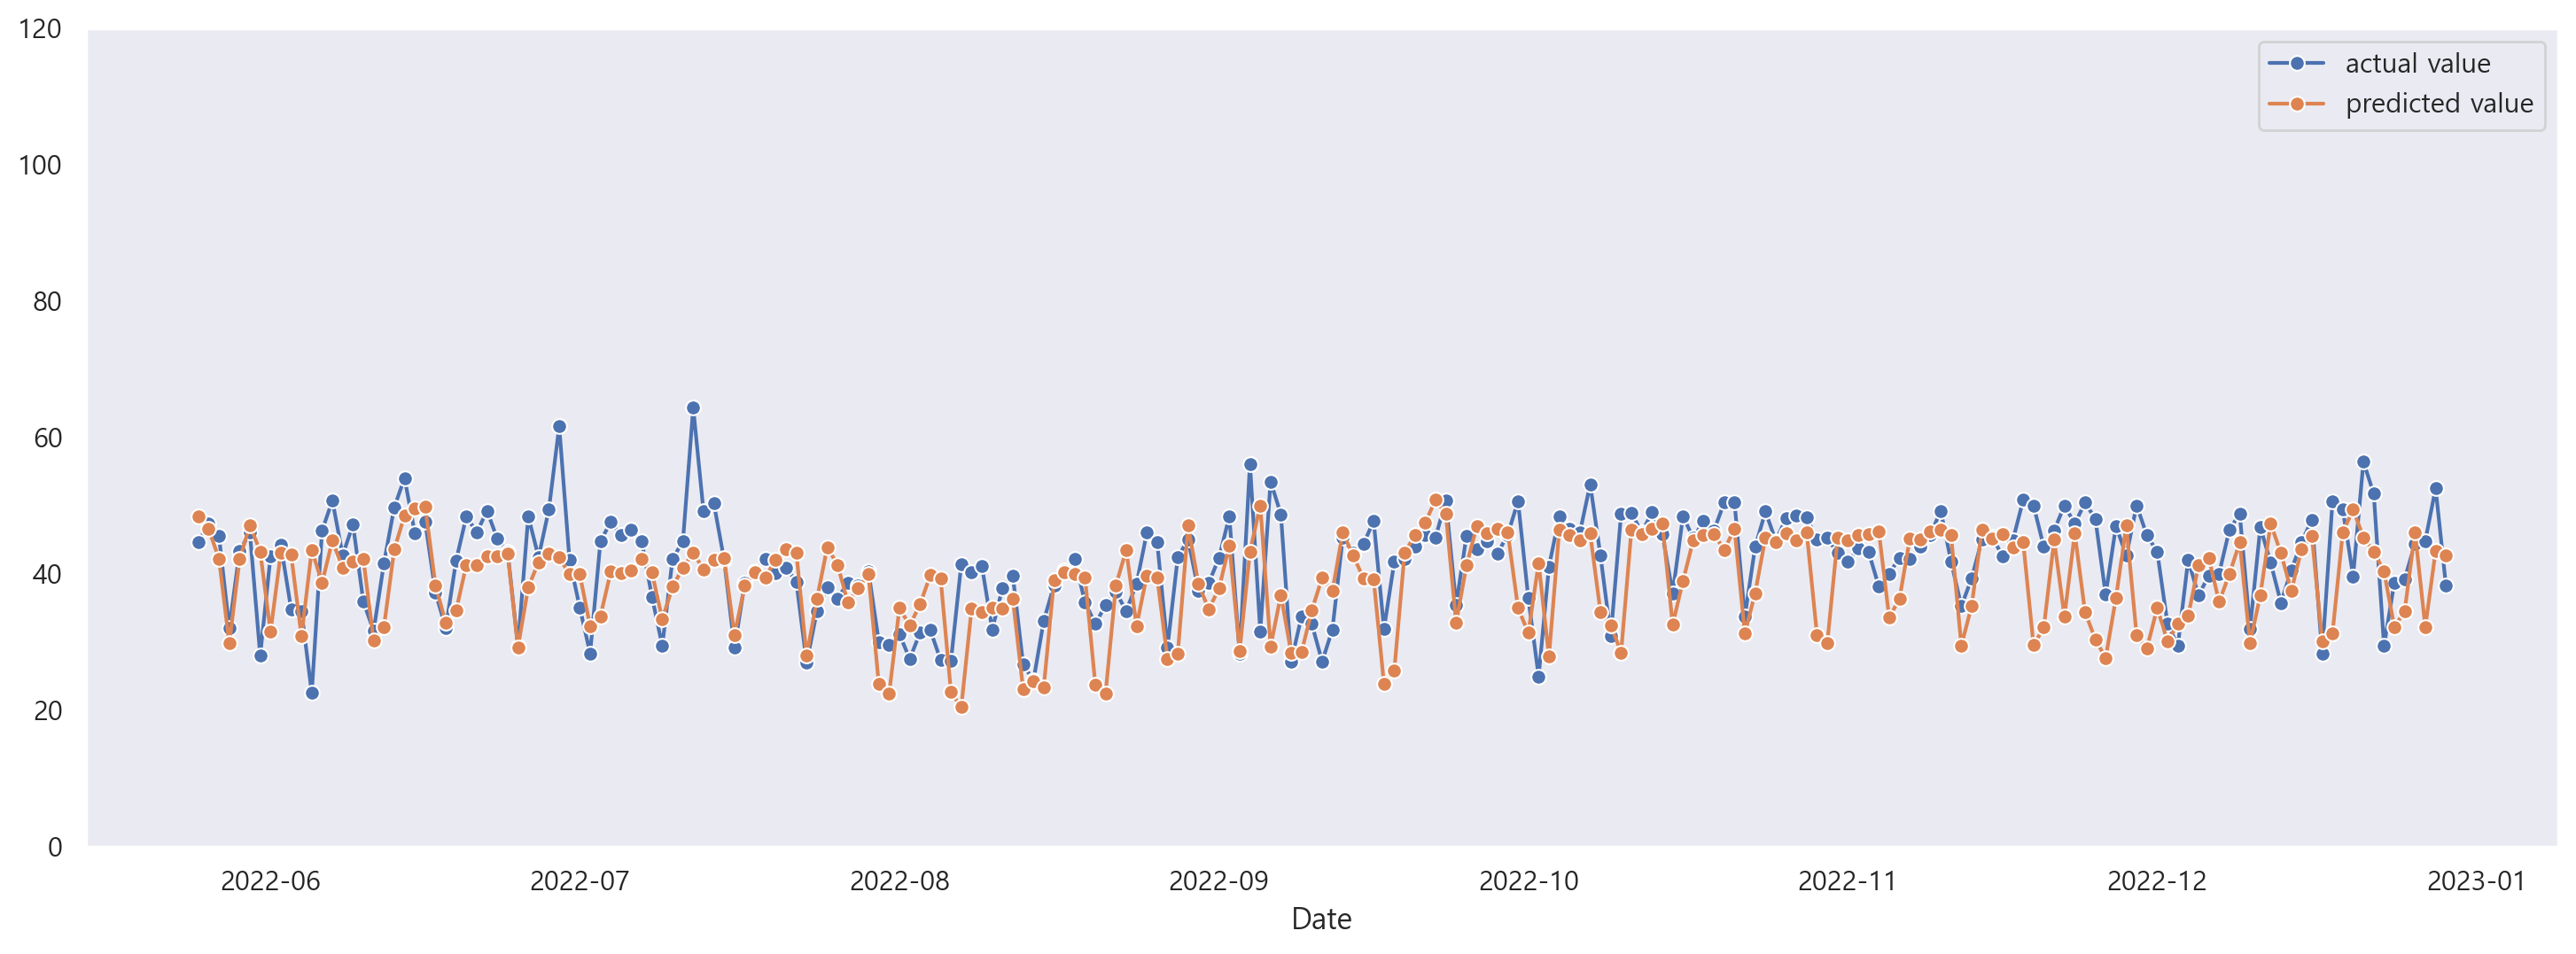

========== LGBMRegressor ==============================
MAPE :  0.1392381967533907
MAE :  5.66675
R2 :  -0.04562


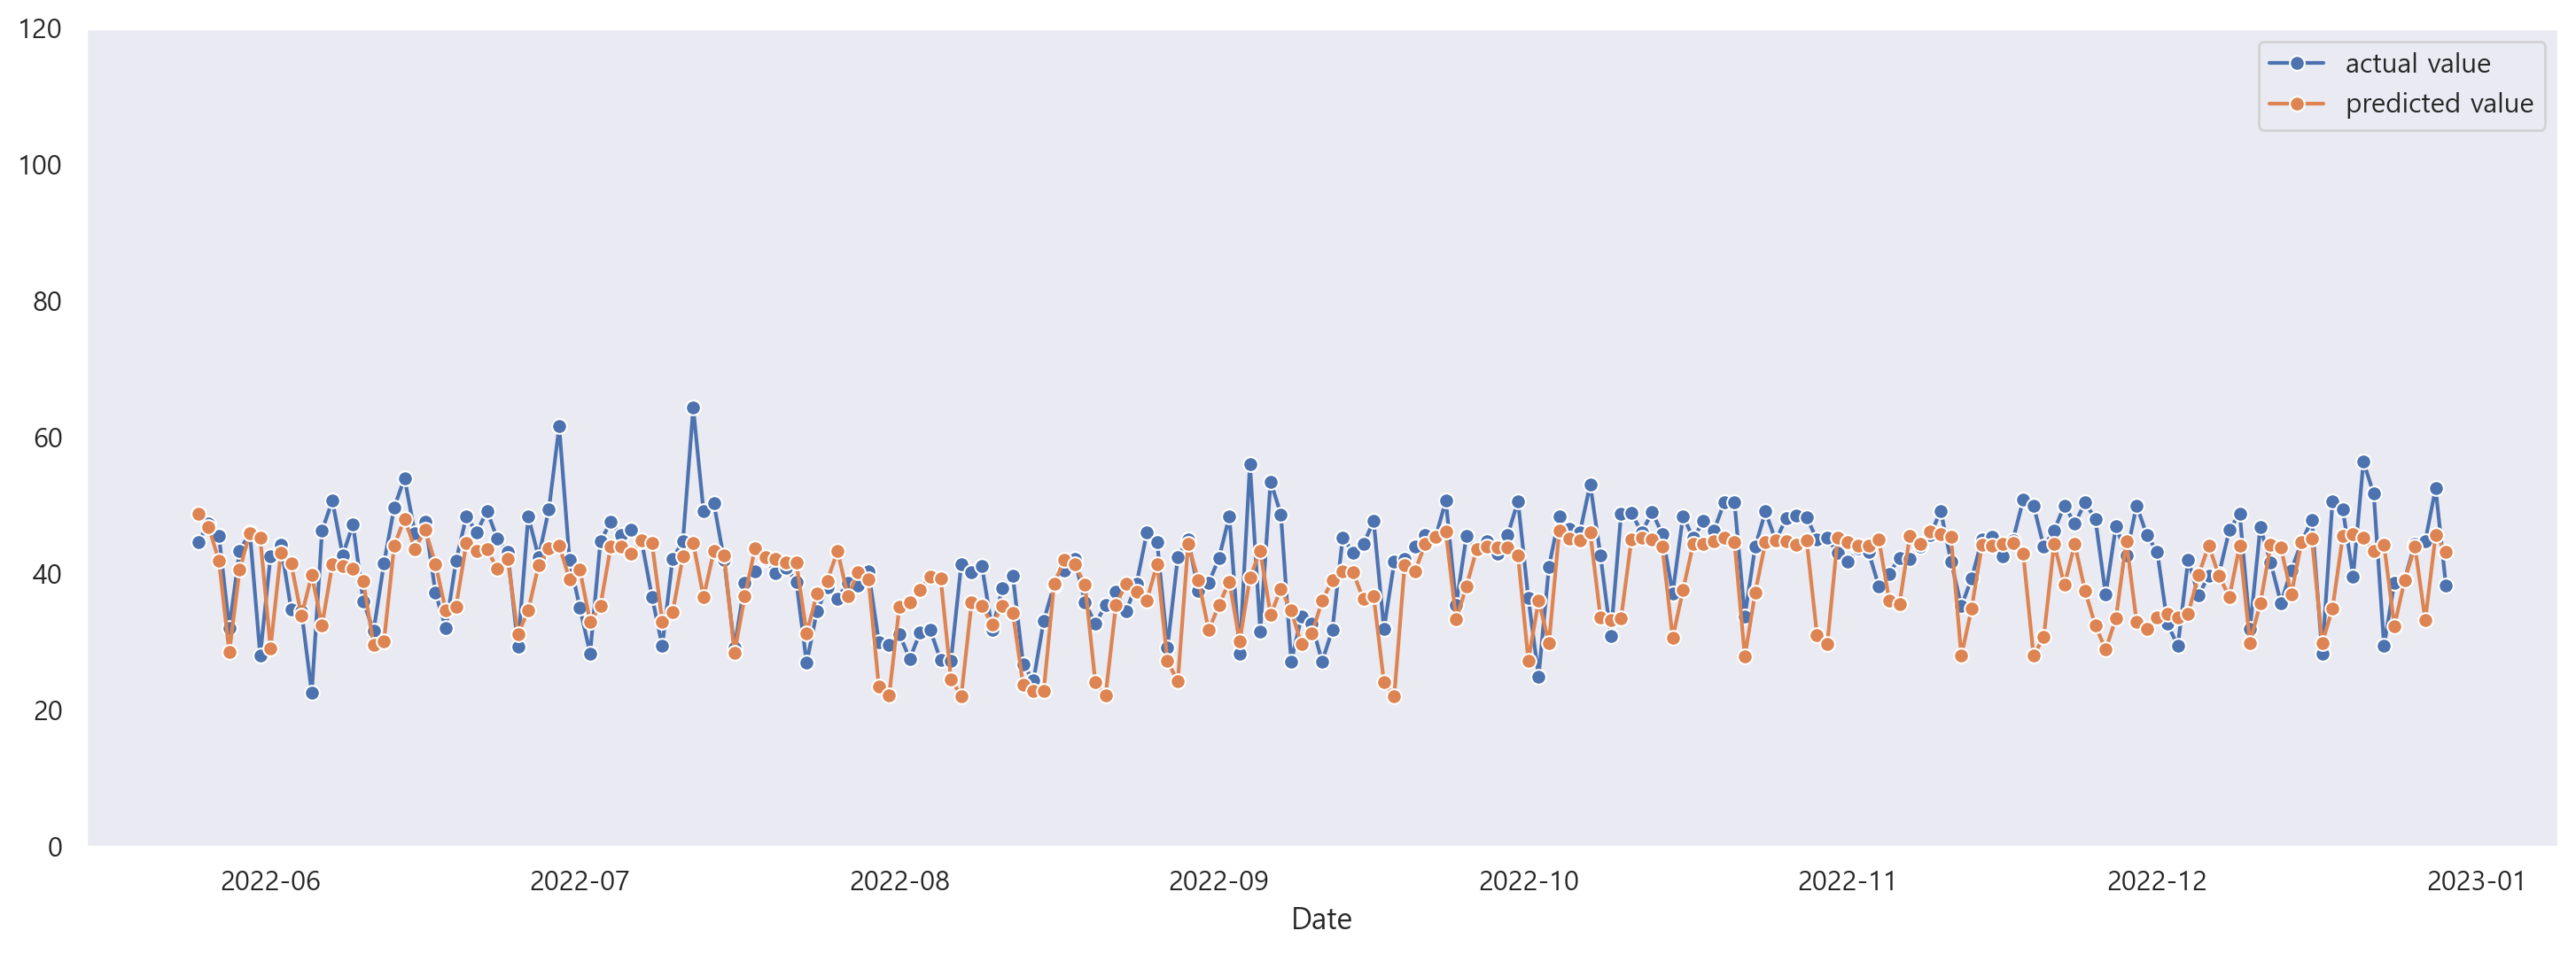

In [156]:
create_model(models, model_name, x_tr, x_val, y_tr, y_val, x_train_s, x_test_s)

In [157]:
def check_test(model, model_name, x_test):
    for model, model_name in zip(models, model_name):
        model = joblib.load(model_name + '.pkl')
        y_pred = model.predict(x_test)
        print('=' * 10, model_name, '=' * 30)
        print('MAPE : ', mean_absolute_percentage_error(y_test, y_pred))
        print('MAE : ', mean_absolute_error(y_test, y_pred).round(5))
        print('R2 : ', r2_score(y_test, y_pred).round(5))

In [158]:
check_test(models, model_name, x_test)

========== KNeighborsRegressor ==============================
MAPE :  0.1900288058323895
MAE :  6.5926
R2 :  -0.42474
========== LinearRegression ==============================
MAPE :  0.1221118138907139
MAE :  4.82781
R2 :  0.24533
========== Lasso ==============================
MAPE :  0.12904103849652826
MAE :  5.0641
R2 :  0.23768
========== Ridge ==============================
MAPE :  0.12361413550477897
MAE :  4.82885
R2 :  0.25981
========== DecisionTreeRegressor ==============================
MAPE :  0.16962331758492927
MAE :  6.73333
R2 :  -0.55532
========== RandomForestRegressor ==============================
MAPE :  0.1351274156500011
MAE :  5.54615
R2 :  -0.03445
========== GradientBoostingRegressor ==============================
MAPE :  0.13579805893506997
MAE :  5.57388
R2 :  0.00584
========== XGBRegressor ==============================
MAPE :  0.13927355277366343
MAE :  5.67824
R2 :  -0.08714
========== LGBMRegressor ==============================
MAPE :  0.13923819675

## Crossval

In [105]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model_LR = LinearRegression()
model_KN = KNeighborsRegressor()
model_DTR = DTR(max_depth=5)
model_RFR = RFR()
model_XGB = XGBRegressor()
model_LGB = LGBMRegressor(verbose=-1)

In [106]:
cv_score_LR = cross_val_score(model_LR, x_train, y_train, cv=10)
cv_score_KN = cross_val_score(model_KN, x_train_s, y_train, cv=10)
cv_score_DTR = cross_val_score(model_DTR, x_train, y_train, cv=10)
cv_score_RFR = cross_val_score(model_RFR, x_train, y_train, cv=10)
cv_score_XGB = cross_val_score(model_XGB, x_train, y_train, cv=10)
cv_score_LGB = cross_val_score(model_LGB, x_train, y_train, cv=10)

In [107]:
print('LR', cv_score_LR.mean())
print('KN', cv_score_KN.mean())
print('DTR', cv_score_DTR.mean())
print('RFR', cv_score_RFR.mean())
print('XGB', cv_score_XGB.mean())
print('LGB', cv_score_LGB.mean())

LR 0.3544880933068429
KN 0.25876236534639024
DTR 0.08561883802433404
RFR 0.3420979205922813
XGB 0.28047690932472535
LGB 0.3019154911401986


In [108]:
result = {}
result['LinearRegression'] = (cv_score_LR.mean()).round(5)
result['KNeighborsRegressor'] = (cv_score_KN.mean()).round(5)
result['DecisionTreeRegressor'] = (cv_score_DTR.mean()).round(5)
result['RandomForestRegressor'] = (cv_score_RFR.mean()).round(5)
result['XGBRegressor'] = (cv_score_XGB.mean()).round(5)
result['LGBMRegressor'] = (cv_score_LGB.mean()).round(5)
result

{'LinearRegression': 0.35449,
 'KNeighborsRegressor': 0.25876,
 'DecisionTreeRegressor': 0.08562,
 'RandomForestRegressor': 0.3421,
 'XGBRegressor': 0.28048,
 'LGBMRegressor': 0.30192}

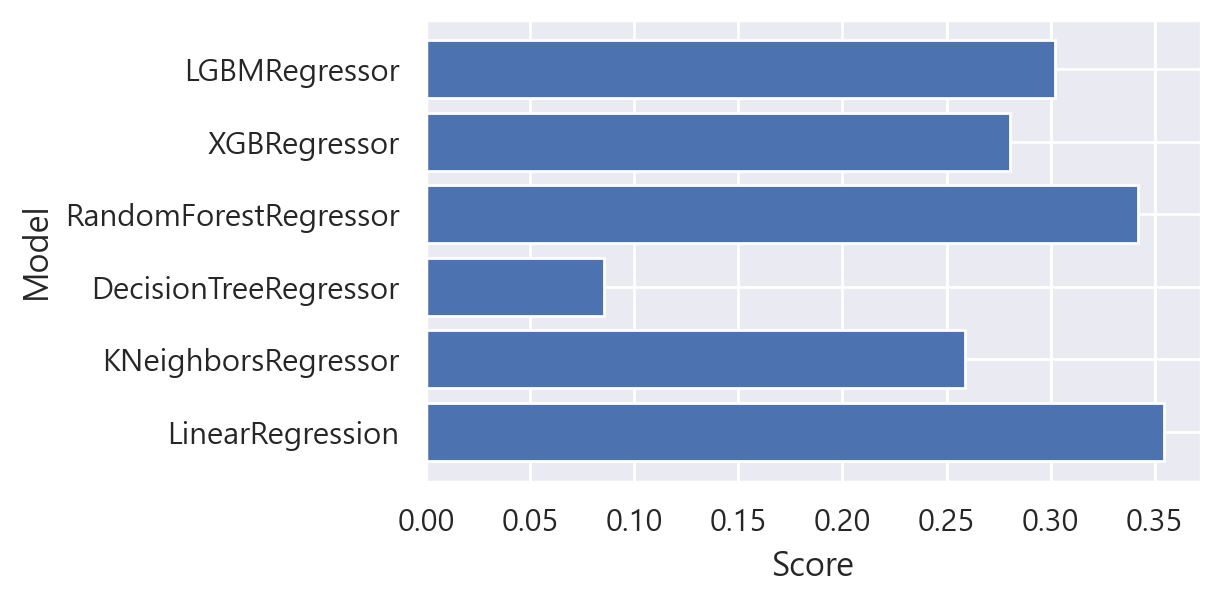

In [109]:
# 시각화
plt.figure(figsize=(5, 3))
plt.barh(list(result), result.values())
plt.xlabel('Score')
plt.ylabel('Model')
plt.show()